In [154]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Loading and Reading Data

In [155]:
# Reading the csv file and putting it into 'df' object.
df_original = pd.read_csv('telecom_churn_data.csv')
df = df_original
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [156]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [157]:
# shape of the DF
df.shape

(99999, 226)

In [158]:
#listing of column names
print(df.columns.values)

['mobile_number' 'circle_id' 'loc_og_t2o_mou' 'std_og_t2o_mou'
 'loc_ic_t2o_mou' 'last_date_of_month_6' 'last_date_of_month_7'
 'last_date_of_month_8' 'last_date_of_month_9' 'arpu_6' 'arpu_7' 'arpu_8'
 'arpu_9' 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'onnet_mou_9'
 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8' 'offnet_mou_9'
 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8' 'roam_ic_mou_9'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'roam_og_mou_9'
 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8'
 'loc_og_t2t_mou_9' 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7'
 'loc_og_t2m_mou_8' 'loc_og_t2m_mou_9' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2f_mou_9'
 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8'
 'loc_og_t2c_mou_9' 'loc_og_mou_6' 'loc_og_mou_7' 'loc_og_mou_8'
 'loc_og_mou_9' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2t_mou_9' 'std_og_t2m_mou_6' 'std_og_t2m_mou_7'
 'std_og_t2m_mou_8' 'std_og_t2m_mou_9' 'std_og_t2f_mou_6

# Missing Data


In [159]:
#Identify Missing Columns
# Treat Missing Values by dropping, Imputing or using iterative imputation

In [160]:
#inspecting number of columns with all items as Null Values where % of Null is greater than 70%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>70]
df_null


0
arpu_3g_6                 74.85
night_pck_user_6          74.85
total_rech_data_6         74.85
arpu_2g_6                 74.85
max_rech_data_6           74.85
fb_user_6                 74.85
av_rech_amt_data_6        74.85
date_of_last_rech_data_6  74.85
count_rech_2g_6           74.85
count_rech_3g_6           74.85
date_of_last_rech_data_7  74.43
total_rech_data_7         74.43
fb_user_7                 74.43
max_rech_data_7           74.43
night_pck_user_7          74.43
count_rech_2g_7           74.43
av_rech_amt_data_7        74.43
arpu_2g_7                 74.43
count_rech_3g_7           74.43
arpu_3g_7                 74.43
total_rech_data_9         74.08
count_rech_3g_9           74.08
fb_user_9                 74.08
max_rech_data_9           74.08
arpu_3g_9                 74.08
date_of_last_rech_data_9  74.08
night_pck_user_9          74.08
arpu_2g_9                 74.08
count_rech_2g_9           74.08
av_rech_amt_data_9        74.08
total_rech_data_8         73.66
arpu_3g_8                 73.66
fb_user_8                 73.66
night_pck_user_8          73.66
av_rech_amt_data_8        73.66
max_rech_data_8           73.66
count_rech_3g_8           73.66
arpu_2g_8                 73.66
count_rech_2g_8           73.66
date_of_last_rech_data_8  73.66

In [161]:
# Certain Columns as below is going to be used for filtering high-value customers
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

# All these columns has more than 70% missing values

print(df.total_rech_data_6.describe()); 
print("\n")
print(df.total_rech_data_7.describe()); 
print("\n")
print(df.total_rech_data_8.describe()); 
print("\n")
print(df.total_rech_data_9.describe()); 
print("\n")
print(df.av_rech_amt_data_6.describe());
print("\n")
print(df.av_rech_amt_data_7.describe());
print("\n")
print(df.av_rech_amt_data_8.describe());
print("\n")
print(df.av_rech_amt_data_9.describe());
print("\n")

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64


count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64


count    26339.000000
mean         2.651999
std          3.074987
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         60.000000
Name: total_rech_data_8, dtype: float64


count    25922.000000
mean         2.441170
std          2.516339
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         84.000000
Name: total_rech_data_9, dtype: float64


count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

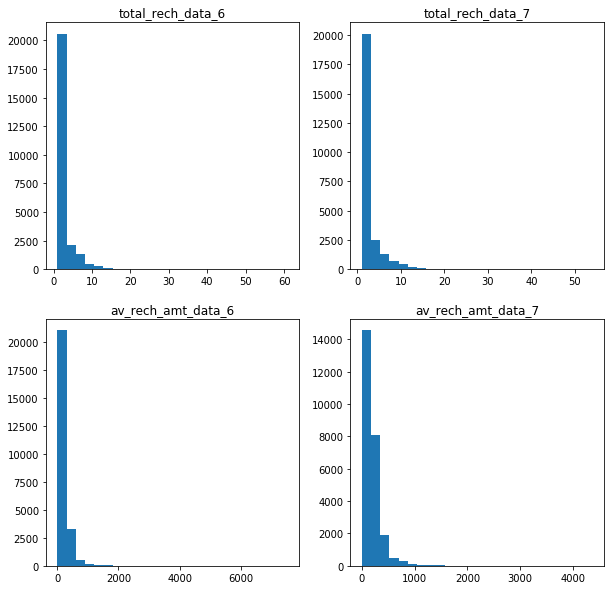

In [162]:
# distribution to find out the value to fill
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(df.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(df.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(df.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(df.av_rech_amt_data_7.dropna(),bins=25)

In [163]:
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed 0


df.total_rech_data_6.fillna(value=0, inplace=True)
df.total_rech_data_7.fillna(value=0, inplace=True)
df.total_rech_data_8.fillna(value=0, inplace=True)
df.total_rech_data_9.fillna(value=0, inplace=True)

df.av_rech_amt_data_6.fillna(value=0, inplace=True)
df.av_rech_amt_data_7.fillna(value=0, inplace=True)
df.av_rech_amt_data_8.fillna(value=0, inplace=True)
df.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [164]:
#inspecting number of columns with all items as Null Values.

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>50]
df_null



0
arpu_2g_6                 74.85
night_pck_user_6          74.85
fb_user_6                 74.85
count_rech_2g_6           74.85
count_rech_3g_6           74.85
date_of_last_rech_data_6  74.85
arpu_3g_6                 74.85
max_rech_data_6           74.85
count_rech_3g_7           74.43
night_pck_user_7          74.43
count_rech_2g_7           74.43
arpu_3g_7                 74.43
date_of_last_rech_data_7  74.43
fb_user_7                 74.43
arpu_2g_7                 74.43
max_rech_data_7           74.43
arpu_2g_9                 74.08
arpu_3g_9                 74.08
date_of_last_rech_data_9  74.08
night_pck_user_9          74.08
max_rech_data_9           74.08
count_rech_3g_9           74.08
fb_user_9                 74.08
count_rech_2g_9           74.08
night_pck_user_8          73.66
max_rech_data_8           73.66
fb_user_8                 73.66
date_of_last_rech_data_8  73.66
count_rech_2g_8           73.66
arpu_3g_8                 73.66
count_rech_3g_8           73.66
arpu_2g_8                 73.66

In [165]:
# the columns names with user are dummy variables from categorical variables

# let us analyse Night Pack User

print("Night pack user - June  = ",df.night_pck_user_6.unique())
print("\n")
print("Night pack user - July  = ",df.night_pck_user_7.unique())
print("\n")
print("Night pack user - August  = ",df.night_pck_user_8.unique())
print("\n")
print("Night pack user - Sep  = ",df.night_pck_user_9.unique())
print("\n")



print("FB user - June  = ",df.fb_user_6.unique())
print("\n")
print("FB user - July  = ",df.fb_user_7.unique())
print("\n")
print("FB user - August  = ",df.fb_user_8.unique())
print("\n")
print("FB user - September  = ",df.fb_user_9.unique())
print("\n")


Night pack user - June  =  [ 0. nan  1.]


Night pack user - July  =  [ 0. nan  1.]


Night pack user - August  =  [ 0. nan  1.]


Night pack user - Sep  =  [nan  0.  1.]


FB user - June  =  [ 1. nan  0.]


FB user - July  =  [ 1. nan  0.]


FB user - August  =  [ 1. nan  0.]


FB user - September  =  [nan  1.  0.]




In [166]:
# We would like to impute categorical Missing values with '-1'  and treat as seperate category

cat_null = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for nullval in cat_null:
    df[nullval].fillna(value=-1, inplace=True)

In [167]:
# Create dummy variables for all the identifed categorial variables

night_pck_user_6_s = pd.get_dummies(df['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(df['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(df['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(df['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(df['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(df['fb_user_8'],prefix="fb8",drop_first=True)

df = pd.concat([df,night_pck_user_6_s],axis=1)
df = pd.concat([df,night_pck_user_7_s],axis=1)
df = pd.concat([df,night_pck_user_8_s],axis=1)

df = pd.concat([df,fb_user_6_s],axis=1)
df = pd.concat([df,fb_user_7_s],axis=1)
df = pd.concat([df,fb_user_8_s],axis=1)

# drop all categorial columns
df = df.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [168]:
#list of columns with number of unique values is equal 1. As with 1 value no meaningful analysis can be done
unique_stats = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

feature  nunique
1               circle_id        1
2          loc_og_t2o_mou        1
3          std_og_t2o_mou        1
4          loc_ic_t2o_mou        1
5    last_date_of_month_6        1
6    last_date_of_month_7        1
7    last_date_of_month_8        1
8    last_date_of_month_9        1
61       std_og_t2c_mou_6        1
62       std_og_t2c_mou_7        1
63       std_og_t2c_mou_8        1
64       std_og_t2c_mou_9        1
113      std_ic_t2o_mou_6        1
114      std_ic_t2o_mou_7        1
115      std_ic_t2o_mou_8        1
116      std_ic_t2o_mou_9        1

In [169]:
#dropping columns with 1 unique value
df = df.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))


In [170]:
#inspecting number of columns with all items as Null Values >70%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>70]
df_null



0
arpu_3g_6                 74.85
date_of_last_rech_data_6  74.85
arpu_2g_6                 74.85
max_rech_data_6           74.85
count_rech_2g_6           74.85
count_rech_3g_6           74.85
arpu_3g_7                 74.43
date_of_last_rech_data_7  74.43
max_rech_data_7           74.43
arpu_2g_7                 74.43
count_rech_2g_7           74.43
count_rech_3g_7           74.43
arpu_2g_9                 74.08
date_of_last_rech_data_9  74.08
count_rech_2g_9           74.08
count_rech_3g_9           74.08
max_rech_data_9           74.08
arpu_3g_9                 74.08
count_rech_3g_8           73.66
arpu_3g_8                 73.66
count_rech_2g_8           73.66
arpu_2g_8                 73.66
date_of_last_rech_data_8  73.66
max_rech_data_8           73.66

In [171]:
#number of rows with Null
df['arpu_3g_6'].isna().sum()

74846

In [172]:
#key statistics
df['arpu_3g_6'].describe()

count    25153.000000
mean        89.555057
std        193.124653
min        -30.820000
25%          0.000000
50%          0.480000
75%        122.070000
max       6362.280000
Name: arpu_3g_6, dtype: float64

In [173]:
#See other related columns
df[df['arpu_3g_6'].isna()][['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6', 
                            'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_2g_6'
                           ]].head(25)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
1                       NaN                0.0              NaN   
2                       NaN                0.0              NaN   
3                       NaN                0.0              NaN   
5                       NaN                0.0              NaN   
6                       NaN                0.0              NaN   
7                       NaN                0.0              NaN   
8                       NaN                0.0              NaN   
9                       NaN                0.0              NaN   
10                      NaN                0.0              NaN   
11                      NaN                0.0              NaN   
12                      NaN                0.0              NaN   
13                      NaN                0.0              NaN   
14                      NaN                0.0              NaN   
15                      NaN                0.0              NaN   
16                      NaN                0.0              NaN   
17                      NaN                0.0              NaN   
18                      NaN                0.0              NaN   
20                      NaN                0.0              NaN   
21                      NaN                0.0              NaN   
22                      NaN                0.0              NaN   
23                      NaN                0.0              NaN   
24                      NaN                0.0              NaN   
25                      NaN                0.0              NaN   
26                      NaN                0.0              NaN   
27                      NaN                0.0              NaN   

    count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  \
1               NaN              NaN                 0.0          0.0   
2               NaN              NaN                 0.0          0.0   
3               NaN              NaN                 0.0          0.0   
5               NaN              NaN                 0.0          0.0   
6               NaN              NaN                 0.0          0.0   
7               NaN              NaN                 0.0          0.0   
8               NaN              NaN                 0.0          0.0   
9               NaN              NaN                 0.0          0.0   
10              NaN              NaN                 0.0          0.0   
11              NaN              NaN                 0.0          0.0   
12              NaN              NaN                 0.0          0.0   
13              NaN              NaN                 0.0          0.0   
14              NaN              NaN                 0.0          0.0   
15              NaN              NaN                 0.0          0.0   
16              NaN              NaN                 0.0          0.0   
17              NaN              NaN                 0.0          0.0   
18              NaN              NaN                 0.0          0.0   
20              NaN              NaN                 0.0          0.0   
21              NaN              NaN                 0.0          0.0   
22              NaN              NaN                 0.0          0.0   
23              NaN              NaN                 0.0          0.0   
24              NaN              NaN                 0.0          0.0   
25              NaN              NaN                 0.0          0.0   
26              NaN              NaN                 0.0          0.0   
27              NaN              NaN                 0.0          0.0   

    vol_3g_mb_6  arpu_2g_6  
1           0.0        NaN  
2           0.0        NaN  
3           0.0        NaN  
5           0.0        NaN  
6           0.0        NaN  
7           0.0        NaN  
8           0.0        NaN  
9           0.0        NaN  
10          0.0        NaN  
11          0.0        NaN  
12          0.0        NaN  
13          0

In [174]:
#See other related columns
df[df['arpu_3g_6'].isna()][['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6', 
                            'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_2g_6'
                           ]].tail(25)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
99963                      NaN                0.0              NaN   
99964                      NaN                0.0              NaN   
99965                      NaN                0.0              NaN   
99966                      NaN                0.0              NaN   
99967                      NaN                0.0              NaN   
99968                      NaN                0.0              NaN   
99971                      NaN                0.0              NaN   
99972                      NaN                0.0              NaN   
99973                      NaN                0.0              NaN   
99974                      NaN                0.0              NaN   
99975                      NaN                0.0              NaN   
99976                      NaN                0.0              NaN   
99977                      NaN                0.0              NaN   
99978                      NaN                0.0              NaN   
99979                      NaN                0.0              NaN   
99983                      NaN                0.0              NaN   
99985                      NaN                0.0              NaN   
99988                      NaN                0.0              NaN   
99989                      NaN                0.0              NaN   
99990                      NaN                0.0              NaN   
99991                      NaN                0.0              NaN   
99992                      NaN                0.0              NaN   
99993                      NaN                0.0              NaN   
99994                      NaN                0.0              NaN   
99995                      NaN                0.0              NaN   

       count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  \
99963              NaN              NaN                 0.0          0.0   
99964              NaN              NaN                 0.0          0.0   
99965              NaN              NaN                 0.0          0.0   
99966              NaN              NaN                 0.0          0.0   
99967              NaN              NaN                 0.0          0.0   
99968              NaN              NaN                 0.0          0.0   
99971              NaN              NaN                 0.0          0.0   
99972              NaN              NaN                 0.0          0.0   
99973              NaN              NaN                 0.0          0.0   
99974              NaN              NaN                 0.0          0.0   
99975              NaN              NaN                 0.0          0.0   
99976              NaN              NaN                 0.0          0.0   
99977              NaN              NaN                 0.0          0.0   
99978              NaN              NaN                 0.0          0.0   
99979              NaN              NaN                 0.0          0.0   
99983              NaN              NaN                 0.0          0.0   
99985              NaN              NaN                 0.0          0.0   
99988              NaN              NaN                 0.0          0.0   
99989              NaN              NaN                 0.0          0.0   
99990              NaN              NaN                 0.0          0.0   
99991              NaN              NaN                 0.0          0.0   
99992              NaN              NaN                 0.0          0.0   
99993              NaN              NaN                 0.0          0.0   
99994              NaN              NaN                 0.0          0.0   
99995              NaN              NaN                 0.0          0.0   

       vol_3g_mb_6  arpu_2g_6  
99963          0.0        NaN  
99964          0.0        NaN  
99965          0.0        NaN  
99966          0.0        NaN  
99967          0.0        NaN  
99968          0

In [175]:
#It is apparent that the Customer has not bought the data at all in 6th month. 
#We will impute the Null with 0 , similarly other related columsn to also be imputed zero as if revenue is zero,
#max_rech_data = maximum recharge of data. Assuming NA means 0
#total_rech_data = maximum recharge of data. Assuming NA means 0
#count_rech_2g/3g - indicates the amount of recharges of 2G and 3G.
# where null assuming it is 0 as it is numeric


df['arpu_3g_6'].fillna(0,inplace=True)
df['arpu_2g_6'].fillna(0,inplace=True)
df['max_rech_data_6'].fillna(0,inplace=True)
df['count_rech_2g_6'].fillna(0,inplace=True)
df['count_rech_3g_6'].fillna(0,inplace=True)

df.drop(df[df['arpu_2g_6']<0].index, inplace = True)
df.drop(df[df['arpu_3g_6']<0].index, inplace = True)


In [176]:
#inspecting number of columns with all items as Null Values >70%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>70]
df_null



0
date_of_last_rech_data_6  75.82
date_of_last_rech_data_7  75.19
max_rech_data_7           75.19
arpu_2g_7                 75.19
count_rech_2g_7           75.19
count_rech_3g_7           75.19
arpu_3g_7                 75.19
arpu_2g_9                 74.72
date_of_last_rech_data_9  74.72
arpu_3g_9                 74.72
count_rech_3g_9           74.72
count_rech_2g_9           74.72
max_rech_data_9           74.72
date_of_last_rech_data_8  74.37
count_rech_2g_8           74.37
arpu_3g_8                 74.37
arpu_2g_8                 74.37
max_rech_data_8           74.37
count_rech_3g_8           74.37

In [177]:
#key statistics
df['arpu_3g_7'].describe()

count    24491.000000
mean        92.013853
std        198.806622
min        -26.040000
25%          0.000000
50%          0.730000
75%        122.070000
max       4980.900000
Name: arpu_3g_7, dtype: float64

In [178]:
#See other related columns
df[df['arpu_3g_7'].isna()][['date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','count_rech_2g_7', 
                            'count_rech_3g_7', 'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_2g_7'
                           ]].head(25)

date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  \
2                       NaN                0.0              NaN   
3                       NaN                0.0              NaN   
4                       NaN                0.0              NaN   
5                       NaN                0.0              NaN   
6                       NaN                0.0              NaN   
7                       NaN                0.0              NaN   
10                      NaN                0.0              NaN   
11                      NaN                0.0              NaN   
12                      NaN                0.0              NaN   
13                      NaN                0.0              NaN   
14                      NaN                0.0              NaN   
15                      NaN                0.0              NaN   
16                      NaN                0.0              NaN   
17                      NaN                0.0              NaN   
18                      NaN                0.0              NaN   
20                      NaN                0.0              NaN   
21                      NaN                0.0              NaN   
22                      NaN                0.0              NaN   
24                      NaN                0.0              NaN   
25                      NaN                0.0              NaN   
27                      NaN                0.0              NaN   
28                      NaN                0.0              NaN   
29                      NaN                0.0              NaN   
30                      NaN                0.0              NaN   
31                      NaN                0.0              NaN   

    count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  vol_2g_mb_7  \
2               NaN              NaN                 0.0          0.0   
3               NaN              NaN                 0.0          0.0   
4               NaN              NaN                 0.0          0.0   
5               NaN              NaN                 0.0          0.0   
6               NaN              NaN                 0.0          0.0   
7               NaN              NaN                 0.0          0.0   
10              NaN              NaN                 0.0          0.0   
11              NaN              NaN                 0.0          0.0   
12              NaN              NaN                 0.0          0.0   
13              NaN              NaN                 0.0          0.0   
14              NaN              NaN                 0.0          0.0   
15              NaN              NaN                 0.0          0.0   
16              NaN              NaN                 0.0          0.0   
17              NaN              NaN                 0.0          0.0   
18              NaN              NaN                 0.0          0.0   
20              NaN              NaN                 0.0          0.0   
21              NaN              NaN                 0.0          0.0   
22              NaN              NaN                 0.0          0.0   
24              NaN              NaN                 0.0          0.0   
25              NaN              NaN                 0.0          0.0   
27              NaN              NaN                 0.0          0.0   
28              NaN              NaN                 0.0          0.0   
29              NaN              NaN                 0.0          0.0   
30              NaN              NaN                 0.0          0.0   
31              NaN              NaN                 0.0          0.0   

    vol_3g_mb_7  arpu_2g_7  
2           0.0        NaN  
3           0.0        NaN  
4           0.0        NaN  
5           0.0        NaN  
6           0.0        NaN  
7           0.0        NaN  
10          0.0        NaN  
11          0.0        NaN  
12          0.0        NaN  
13          0.0        NaN  
14          0.0        NaN  
15          0

In [179]:
#See other related columns
df[df['arpu_3g_7'].isna()][['date_of_last_rech_data_7','total_rech_data_7','max_rech_data_7','count_rech_2g_7', 
                            'count_rech_3g_7', 'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_2g_7'
                           ]].tail(25)

date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  \
99966                      NaN                0.0              NaN   
99967                      NaN                0.0              NaN   
99969                      NaN                0.0              NaN   
99971                      NaN                0.0              NaN   
99972                      NaN                0.0              NaN   
99973                      NaN                0.0              NaN   
99974                      NaN                0.0              NaN   
99975                      NaN                0.0              NaN   
99976                      NaN                0.0              NaN   
99977                      NaN                0.0              NaN   
99978                      NaN                0.0              NaN   
99979                      NaN                0.0              NaN   
99980                      NaN                0.0              NaN   
99982                      NaN                0.0              NaN   
99983                      NaN                0.0              NaN   
99985                      NaN                0.0              NaN   
99987                      NaN                0.0              NaN   
99989                      NaN                0.0              NaN   
99991                      NaN                0.0              NaN   
99992                      NaN                0.0              NaN   
99993                      NaN                0.0              NaN   
99994                      NaN                0.0              NaN   
99995                      NaN                0.0              NaN   
99996                      NaN                0.0              NaN   
99998                      NaN                0.0              NaN   

       count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  vol_2g_mb_7  \
99966              NaN              NaN                 0.0          0.0   
99967              NaN              NaN                 0.0          0.0   
99969              NaN              NaN                 0.0          0.0   
99971              NaN              NaN                 0.0          0.0   
99972              NaN              NaN                 0.0          0.0   
99973              NaN              NaN                 0.0          0.0   
99974              NaN              NaN                 0.0          0.0   
99975              NaN              NaN                 0.0          0.0   
99976              NaN              NaN                 0.0          0.0   
99977              NaN              NaN                 0.0          0.0   
99978              NaN              NaN                 0.0          0.0   
99979              NaN              NaN                 0.0          0.0   
99980              NaN              NaN                 0.0          0.0   
99982              NaN              NaN                 0.0          0.0   
99983              NaN              NaN                 0.0          0.0   
99985              NaN              NaN                 0.0          0.0   
99987              NaN              NaN                 0.0          0.0   
99989              NaN              NaN                 0.0          0.0   
99991              NaN              NaN                 0.0          0.0   
99992              NaN              NaN                 0.0          0.0   
99993              NaN              NaN                 0.0          0.0   
99994              NaN              NaN                 0.0          0.0   
99995              NaN              NaN                 0.0          0.0   
99996              NaN              NaN                 0.0          0.0   
99998              NaN              NaN                 0.0          0.0   

       vol_3g_mb_7  arpu_2g_7  
99966          0.0        NaN  
99967          0.0        NaN  
99969          0.0        NaN  
99971          0.0        NaN  
99972          0.0        NaN  
99973          0

In [180]:
#It is apparent that the Customer has not bought the data at all in 6th month. 
#We will impute the Null with 0 , similarly other related columsn to also be imputed zero as if revenue is zero,
#max_rech_data = maximum recharge of data. Assuming NA means 0
#total_rech_data = maximum recharge of data. Assuming NA means 0
#count_rech_2g/3g - indicates the amount of recharges of 2G and 3G.
# where null assuming it is 0 as it is numeric


df['arpu_3g_7'].fillna(0,inplace=True)
df['arpu_2g_7'].fillna(0,inplace=True)
df['max_rech_data_7'].fillna(0,inplace=True)
df['count_rech_2g_7'].fillna(0,inplace=True)
df['count_rech_3g_7'].fillna(0,inplace=True)
#for nagtive values
df.drop(df[df['arpu_2g_7']<0].index, inplace = True)
df.drop(df[df['arpu_3g_7']<0].index, inplace = True)



In [181]:
#inspecting number of columns with all items as Null Values >70%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>70]
df_null



0
date_of_last_rech_data_6  76.03
date_of_last_rech_data_7  75.42
arpu_3g_9                 74.88
date_of_last_rech_data_9  74.88
max_rech_data_9           74.88
arpu_2g_9                 74.88
count_rech_2g_9           74.88
count_rech_3g_9           74.88
date_of_last_rech_data_8  74.55
max_rech_data_8           74.55
count_rech_2g_8           74.55
arpu_2g_8                 74.55
count_rech_3g_8           74.55
arpu_3g_8                 74.55

In [182]:
#key statistics
df['arpu_3g_8'].describe()

count    25049.000000
mean        94.091931
std        191.449122
min        -20.430000
25%          0.000000
50%          1.200000
75%        126.220000
max       3716.900000
Name: arpu_3g_8, dtype: float64

In [183]:
#See other related columns
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8'
                           ]].head(25)

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
2                       NaN                0.0              NaN   
3                       NaN                0.0              NaN   
4                       NaN                0.0              NaN   
5                       NaN                0.0              NaN   
6                       NaN                0.0              NaN   
7                       NaN                0.0              NaN   
9                       NaN                0.0              NaN   
12                      NaN                0.0              NaN   
14                      NaN                0.0              NaN   
15                      NaN                0.0              NaN   
16                      NaN                0.0              NaN   
17                      NaN                0.0              NaN   
18                      NaN                0.0              NaN   
20                      NaN                0.0              NaN   
21                      NaN                0.0              NaN   
22                      NaN                0.0              NaN   
24                      NaN                0.0              NaN   
25                      NaN                0.0              NaN   
27                      NaN                0.0              NaN   
29                      NaN                0.0              NaN   
30                      NaN                0.0              NaN   
31                      NaN                0.0              NaN   
32                      NaN                0.0              NaN   
35                      NaN                0.0              NaN   
36                      NaN                0.0              NaN   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
2               NaN              NaN                 0.0          0.0   
3               NaN              NaN                 0.0          0.0   
4               NaN              NaN                 0.0          0.0   
5               NaN              NaN                 0.0          0.0   
6               NaN              NaN                 0.0          0.0   
7               NaN              NaN                 0.0          0.0   
9               NaN              NaN                 0.0          0.0   
12              NaN              NaN                 0.0          0.0   
14              NaN              NaN                 0.0          0.0   
15              NaN              NaN                 0.0          0.0   
16              NaN              NaN                 0.0          0.0   
17              NaN              NaN                 0.0          0.0   
18              NaN              NaN                 0.0          0.0   
20              NaN              NaN                 0.0          0.0   
21              NaN              NaN                 0.0          0.0   
22              NaN              NaN                 0.0          0.0   
24              NaN              NaN                 0.0          0.0   
25              NaN              NaN                 0.0          0.0   
27              NaN              NaN                 0.0          0.0   
29              NaN              NaN                 0.0          0.0   
30              NaN              NaN                 0.0          0.0   
31              NaN              NaN                 0.0          0.0   
32              NaN              NaN                 0.0          0.0   
35              NaN              NaN                 0.0          0.0   
36              NaN              NaN                 0.0          0.0   

    vol_3g_mb_8  arpu_2g_8  
2           0.0        NaN  
3           0.0        NaN  
4           0.0        NaN  
5           0.0        NaN  
6           0.0        NaN  
7           0.0        NaN  
9           0.0        NaN  
12          0.0        NaN  
14          0.0        NaN  
15          0.0        NaN  
16          0.0        NaN  
17          0

In [184]:
#See other related columns
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8'
                           ]].tail(25)

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
99966                      NaN                0.0              NaN   
99967                      NaN                0.0              NaN   
99968                      NaN                0.0              NaN   
99969                      NaN                0.0              NaN   
99970                      NaN                0.0              NaN   
99971                      NaN                0.0              NaN   
99973                      NaN                0.0              NaN   
99974                      NaN                0.0              NaN   
99975                      NaN                0.0              NaN   
99976                      NaN                0.0              NaN   
99977                      NaN                0.0              NaN   
99978                      NaN                0.0              NaN   
99979                      NaN                0.0              NaN   
99983                      NaN                0.0              NaN   
99985                      NaN                0.0              NaN   
99987                      NaN                0.0              NaN   
99989                      NaN                0.0              NaN   
99990                      NaN                0.0              NaN   
99991                      NaN                0.0              NaN   
99992                      NaN                0.0              NaN   
99993                      NaN                0.0              NaN   
99994                      NaN                0.0              NaN   
99995                      NaN                0.0              NaN   
99996                      NaN                0.0              NaN   
99998                      NaN                0.0              NaN   

       count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
99966              NaN              NaN                 0.0          0.0   
99967              NaN              NaN                 0.0          0.0   
99968              NaN              NaN                 0.0          0.0   
99969              NaN              NaN                 0.0          0.0   
99970              NaN              NaN                 0.0          0.0   
99971              NaN              NaN                 0.0          0.0   
99973              NaN              NaN                 0.0          0.0   
99974              NaN              NaN                 0.0          0.0   
99975              NaN              NaN                 0.0          0.0   
99976              NaN              NaN                 0.0          0.0   
99977              NaN              NaN                 0.0          0.0   
99978              NaN              NaN                 0.0          0.0   
99979              NaN              NaN                 0.0          0.0   
99983              NaN              NaN                 0.0          0.0   
99985              NaN              NaN                 0.0          0.0   
99987              NaN              NaN                 0.0          0.0   
99989              NaN              NaN                 0.0          0.0   
99990              NaN              NaN                 0.0          0.0   
99991              NaN              NaN                 0.0          0.0   
99992              NaN              NaN                 0.0          0.0   
99993              NaN              NaN                 0.0          0.0   
99994              NaN              NaN                 0.0          0.0   
99995              NaN              NaN                 0.0          0.0   
99996              NaN              NaN                 0.0          0.0   
99998              NaN              NaN                 0.0          0.0   

       vol_3g_mb_8  arpu_2g_8  
99966          0.0        NaN  
99967          0.0        NaN  
99968          0.0        NaN  
99969          0.0        NaN  
99970          0.0        NaN  
99971          0

In [185]:
#It is apparent that the Customer has not bought the data at all in 6th month. 
#We will impute the Null with 0 , similarly other related columsn to also be imputed zero as if revenue is zero,
#max_rech_data = maximum recharge of data. Assuming NA means 0
#total_rech_data = maximum recharge of data. Assuming NA means 0
#count_rech_2g/3g - indicates the amount of recharges of 2G and 3G.
# where null assuming it is 0 as it is numeric


df['arpu_3g_8'].fillna(0,inplace=True)
df['arpu_2g_8'].fillna(0,inplace=True)
df['max_rech_data_8'].fillna(0,inplace=True)
df['count_rech_2g_8'].fillna(0,inplace=True)
df['count_rech_3g_8'].fillna(0,inplace=True)


#for nagtive values
df.drop(df[df['arpu_2g_8']<0].index, inplace = True)
df.drop(df[df['arpu_3g_8']<0].index, inplace = True)



In [186]:
#inspecting number of columns with all items as Null Values >0%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>70]
df_null



0
date_of_last_rech_data_6  76.26
date_of_last_rech_data_7  75.68
arpu_2g_9                 75.14
arpu_3g_9                 75.14
count_rech_2g_9           75.14
date_of_last_rech_data_9  75.14
count_rech_3g_9           75.14
max_rech_data_9           75.14
date_of_last_rech_data_8  74.90

In [187]:
#key statistics
df['arpu_3g_9'].describe()

count    24351.000000
mean       103.467201
std        221.170796
min        -27.990000
25%          0.000000
50%          3.520000
75%        141.910000
max      13884.310000
Name: arpu_3g_9, dtype: float64

In [188]:
#See other related columns
df[df['arpu_3g_9'].isna()][['date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9', 
                            'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_2g_9'
                           ]].head(25)

date_of_last_rech_data_9  total_rech_data_9  max_rech_data_9  \
0                       NaN                0.0              NaN   
1                       NaN                0.0              NaN   
3                       NaN                0.0              NaN   
4                       NaN                0.0              NaN   
5                       NaN                0.0              NaN   
6                       NaN                0.0              NaN   
7                       NaN                0.0              NaN   
8                       NaN                0.0              NaN   
9                       NaN                0.0              NaN   
11                      NaN                0.0              NaN   
12                      NaN                0.0              NaN   
13                      NaN                0.0              NaN   
14                      NaN                0.0              NaN   
15                      NaN                0.0              NaN   
16                      NaN                0.0              NaN   
17                      NaN                0.0              NaN   
18                      NaN                0.0              NaN   
19                      NaN                0.0              NaN   
20                      NaN                0.0              NaN   
21                      NaN                0.0              NaN   
22                      NaN                0.0              NaN   
24                      NaN                0.0              NaN   
25                      NaN                0.0              NaN   
27                      NaN                0.0              NaN   
28                      NaN                0.0              NaN   

    count_rech_2g_9  count_rech_3g_9  av_rech_amt_data_9  vol_2g_mb_9  \
0               NaN              NaN                 0.0          0.0   
1               NaN              NaN                 0.0          0.0   
3               NaN              NaN                 0.0          0.0   
4               NaN              NaN                 0.0          0.0   
5               NaN              NaN                 0.0          0.0   
6               NaN              NaN                 0.0          0.0   
7               NaN              NaN                 0.0          0.0   
8               NaN              NaN                 0.0          0.0   
9               NaN              NaN                 0.0          0.0   
11              NaN              NaN                 0.0          0.0   
12              NaN              NaN                 0.0          0.0   
13              NaN              NaN                 0.0          0.0   
14              NaN              NaN                 0.0          0.0   
15              NaN              NaN                 0.0          0.0   
16              NaN              NaN                 0.0          0.0   
17              NaN              NaN                 0.0          0.0   
18              NaN              NaN                 0.0          0.0   
19              NaN              NaN                 0.0          0.0   
20              NaN              NaN                 0.0          0.0   
21              NaN              NaN                 0.0          0.0   
22              NaN              NaN                 0.0          0.0   
24              NaN              NaN                 0.0          0.0   
25              NaN              NaN                 0.0          0.0   
27              NaN              NaN                 0.0          0.0   
28              NaN              NaN                 0.0          0.0   

    vol_3g_mb_9  arpu_2g_9  
0           0.0        NaN  
1           0.0        NaN  
3           0.0        NaN  
4           0.0        NaN  
5           0.0        NaN  
6           0.0        NaN  
7           0.0        NaN  
8           0.0        NaN  
9           0.0        NaN  
11          0.0        NaN  
12          0.0        NaN  
13          0

In [189]:
#See other related columns
df[df['arpu_3g_9'].isna()][['date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9', 
                            'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_2g_9'
                           ]].tail(25)

date_of_last_rech_data_9  total_rech_data_9  max_rech_data_9  \
99966                      NaN                0.0              NaN   
99967                      NaN                0.0              NaN   
99968                      NaN                0.0              NaN   
99971                      NaN                0.0              NaN   
99972                      NaN                0.0              NaN   
99973                      NaN                0.0              NaN   
99974                      NaN                0.0              NaN   
99975                      NaN                0.0              NaN   
99976                      NaN                0.0              NaN   
99977                      NaN                0.0              NaN   
99978                      NaN                0.0              NaN   
99979                      NaN                0.0              NaN   
99981                      NaN                0.0              NaN   
99983                      NaN                0.0              NaN   
99985                      NaN                0.0              NaN   
99987                      NaN                0.0              NaN   
99989                      NaN                0.0              NaN   
99990                      NaN                0.0              NaN   
99991                      NaN                0.0              NaN   
99992                      NaN                0.0              NaN   
99993                      NaN                0.0              NaN   
99994                      NaN                0.0              NaN   
99995                      NaN                0.0              NaN   
99996                      NaN                0.0              NaN   
99998                      NaN                0.0              NaN   

       count_rech_2g_9  count_rech_3g_9  av_rech_amt_data_9  vol_2g_mb_9  \
99966              NaN              NaN                 0.0          0.0   
99967              NaN              NaN                 0.0          0.0   
99968              NaN              NaN                 0.0          0.0   
99971              NaN              NaN                 0.0          0.0   
99972              NaN              NaN                 0.0          0.0   
99973              NaN              NaN                 0.0          0.0   
99974              NaN              NaN                 0.0          0.0   
99975              NaN              NaN                 0.0          0.0   
99976              NaN              NaN                 0.0          0.0   
99977              NaN              NaN                 0.0          0.0   
99978              NaN              NaN                 0.0          0.0   
99979              NaN              NaN                 0.0          0.0   
99981              NaN              NaN                 0.0          0.0   
99983              NaN              NaN                 0.0          0.0   
99985              NaN              NaN                 0.0          0.0   
99987              NaN              NaN                 0.0          0.0   
99989              NaN              NaN                 0.0          0.0   
99990              NaN              NaN                 0.0          0.0   
99991              NaN              NaN                 0.0          0.0   
99992              NaN              NaN                 0.0          0.0   
99993              NaN              NaN                 0.0          0.0   
99994              NaN              NaN                 0.0          0.0   
99995              NaN              NaN                 0.0          0.0   
99996              NaN              NaN                 0.0          0.0   
99998              NaN              NaN                 0.0          0.0   

       vol_3g_mb_9  arpu_2g_9  
99966          0.0        NaN  
99967          0.0        NaN  
99968          0.0        NaN  
99971          0.0        NaN  
99972          0.0        NaN  
99973          0

In [190]:
#It is apparent that the Customer has not bought the data at all in 6th month. 
#We will impute the Null with 0 , similarly other related columsn to also be imputed zero as if revenue is zero,
#max_rech_data = maximum recharge of data. Assuming NA means 0
#total_rech_data = maximum recharge of data. Assuming NA means 0
#count_rech_2g/3g - indicates the amount of recharges of 2G and 3G.
# where null assuming it is 0 as it is numeric


df['arpu_3g_9'].fillna(0,inplace=True)
df['arpu_2g_9'].fillna(0,inplace=True)
df['max_rech_data_9'].fillna(0,inplace=True)
df['count_rech_2g_9'].fillna(0,inplace=True)
df['count_rech_3g_9'].fillna(0,inplace=True)

#for nagtive values
df.drop(df[df['arpu_2g_9']<0].index, inplace = True)
df.drop(df[df['arpu_3g_9']<0].index, inplace = True)




In [191]:
#inspecting number of columns with all items as Null Values >70%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>70]
df_null

# we will evaluate this after getting high value customers

0
date_of_last_rech_data_6  76.59
date_of_last_rech_data_7  76.06
date_of_last_rech_data_9  75.62
date_of_last_rech_data_8  75.32

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97337 entries, 0 to 99998
Columns: 216 entries, mobile_number to fb8_1.0
dtypes: float64(162), int64(34), object(8), uint8(12)
memory usage: 153.4+ MB


# Deriving New Features from Date

In [193]:
#Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
#convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before 
#number of days to month end)



In [194]:
# covert date columns to python datetime format
date_colms = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8","date_of_last_rech_data_6",
              "date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9","date_of_last_rech_9"
             ]
df[date_colms].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/16/2014            8/8/2014   
1           6/29/2014           7/31/2014           8/28/2014   
2           6/17/2014           7/24/2014           8/14/2014   
3           6/28/2014           7/31/2014           8/31/2014   
4           6/26/2014           7/28/2014            8/9/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
0                6/21/2014                7/16/2014                 8/8/2014   
1                      NaN                7/25/2014                8/10/2014   
2                      NaN                      NaN                      NaN   
3                      NaN                      NaN                      NaN   
4                 6/4/2014                      NaN                      NaN   

  date_of_last_rech_data_9 date_of_last_rech_9  
0                      NaN           9/28/2014  
1                      NaN           9/30/2014  
2                9/17/2014           9/29/2014  
3                      NaN           9/30/2014  
4                      NaN           9/28/2014

In [195]:
# convert to datetime from column
for col in date_colms:
    df[col] = pd.to_datetime(df[col])

print(df[date_colms].info())
df[date_colms].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97337 entries, 0 to 99998
Data columns (total 8 columns):
date_of_last_rech_6         95737 non-null datetime64[ns]
date_of_last_rech_7         95590 non-null datetime64[ns]
date_of_last_rech_8         93744 non-null datetime64[ns]
date_of_last_rech_data_6    22788 non-null datetime64[ns]
date_of_last_rech_data_7    23305 non-null datetime64[ns]
date_of_last_rech_data_8    24019 non-null datetime64[ns]
date_of_last_rech_data_9    23735 non-null datetime64[ns]
date_of_last_rech_9         92636 non-null datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 6.7 MB
None


date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0          2014-06-21          2014-07-16          2014-08-08   
1          2014-06-29          2014-07-31          2014-08-28   
2          2014-06-17          2014-07-24          2014-08-14   
3          2014-06-28          2014-07-31          2014-08-31   
4          2014-06-26          2014-07-28          2014-08-09   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
0               2014-06-21               2014-07-16               2014-08-08   
1                      NaT               2014-07-25               2014-08-10   
2                      NaT                      NaT                      NaT   
3                      NaT                      NaT                      NaT   
4               2014-06-04                      NaT                      NaT   

  date_of_last_rech_data_9 date_of_last_rech_9  
0                      NaT          2014-09-28  
1                      NaT          2014-09-30  
2               2014-09-17          2014-09-29  
3                      NaT          2014-09-30  
4                      NaT          2014-09-28

In [196]:
# creating new features from date column
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")
last_date_of_month_9 = datetime.datetime.strptime("30-09-2014", "%d-%m-%Y")

df["rech_days_left_6"]      = (last_date_of_month_6 - df.date_of_last_rech_6).astype('timedelta64[D]')
df["rech_days_left_7"]      = (last_date_of_month_7 - df.date_of_last_rech_7).astype('timedelta64[D]')
df["rech_days_left_8"]      = (last_date_of_month_8 - df.date_of_last_rech_8).astype('timedelta64[D]')
df["rech_days_left_9"]      = (last_date_of_month_9 - df.date_of_last_rech_9).astype('timedelta64[D]')

df["rech_days_left_data_9"]      = (last_date_of_month_9 - df.date_of_last_rech_data_9).astype('timedelta64[D]')
df["rech_days_left_data_8"]      = (last_date_of_month_8 - df.date_of_last_rech_data_8).astype('timedelta64[D]')
df["rech_days_left_data_7"]      = (last_date_of_month_7 - df.date_of_last_rech_data_7).astype('timedelta64[D]')
df["rech_days_left_data_6"]      = (last_date_of_month_6 - df.date_of_last_rech_data_6).astype('timedelta64[D]')



In [197]:

# Drop all old date columns: add dates columns to drop_column list
df.drop(date_colms, axis=1, inplace=True)

In [198]:
#seeing the statistics
df[["rech_days_left_data_6","rech_days_left_data_7","rech_days_left_data_8","rech_days_left_data_9",
    "rech_days_left_6","rech_days_left_7","rech_days_left_8","rech_days_left_9"
   
   ]].describe()

rech_days_left_data_6  rech_days_left_data_7  rech_days_left_data_8  \
count           22788.000000           23305.000000           24019.000000   
mean               10.850272              11.210212              11.383988   
std                 8.539108               8.847822               8.910145   
min                 0.000000               0.000000               0.000000   
25%                 3.000000               3.000000               3.000000   
50%                 9.000000               9.000000              10.000000   
75%                18.000000              18.000000              19.000000   
max                29.000000              30.000000              30.000000   

       rech_days_left_data_9  rech_days_left_6  rech_days_left_7  \
count           23735.000000      95737.000000      95590.000000   
mean               10.732083          5.886700          5.514301   
std                 8.432436          6.142229          5.767008   
min                 0.000000          0.000000          0.000000   
25%                 3.000000          1.000000          1.000000   
50%                 9.000000          3.000000          4.000000   
75%                17.000000          9.000000          8.000000   
max                29.000000         29.000000         30.000000   

       rech_days_left_8  rech_days_left_9  
count      93744.000000      92636.000000  
mean           5.541507          4.002871  
std            6.097301          5.451757  
min            0.000000          0.000000  
25%            1.000000          1.000000  
50%            4.000000          2.000000  
75%            7.000000          5.000000  
max           30.000000         29.000000

In [199]:
# imputing with median value for recharge days left 
df.loc[np.isnan(df['rech_days_left_6']), ['rech_days_left_6']] = df['rech_days_left_6'].median()
df.loc[np.isnan(df['rech_days_left_7']), ['rech_days_left_7']] = df['rech_days_left_7'].median()
df.loc[np.isnan(df['rech_days_left_8']), ['rech_days_left_8']] = df['rech_days_left_8'].median()
df.loc[np.isnan(df['rech_days_left_9']), ['rech_days_left_9']] = df['rech_days_left_9'].median()

df.loc[np.isnan(df['rech_days_left_data_9']), ['rech_days_left_data_9']] = df['rech_days_left_data_9'].median()
df.loc[np.isnan(df['rech_days_left_data_8']), ['rech_days_left_data_8']] = df['rech_days_left_data_8'].median()
df.loc[np.isnan(df['rech_days_left_data_7']), ['rech_days_left_data_7']] = df['rech_days_left_data_7'].median()
df.loc[np.isnan(df['rech_days_left_data_6']), ['rech_days_left_data_6']] = df['rech_days_left_data_6'].median()




In [200]:
#inspecting number of columns with all items as Null Values >0%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>0]
df_null


0
loc_og_t2f_mou_9  7.84
std_og_t2t_mou_9  7.84
loc_og_t2t_mou_9  7.84
loc_og_t2m_mou_9  7.84
std_ic_t2m_mou_9  7.84
std_ic_t2t_mou_9  7.84
loc_og_t2c_mou_9  7.84
loc_og_mou_9      7.84
loc_ic_mou_9      7.84
loc_ic_t2f_mou_9  7.84
roam_og_mou_9     7.84
std_og_t2m_mou_9  7.84
loc_ic_t2m_mou_9  7.84
std_og_t2f_mou_9  7.84
std_og_mou_9      7.84
loc_ic_t2t_mou_9  7.84
isd_og_mou_9      7.84
og_others_9       7.84
std_ic_t2f_mou_9  7.84
spl_og_mou_9      7.84
offnet_mou_9      7.84
ic_others_9       7.84
std_ic_mou_9      7.84
spl_ic_mou_9      7.84
onnet_mou_9       7.84
roam_ic_mou_9     7.84
isd_ic_mou_9      7.84
std_og_t2f_mou_8  5.43
std_og_t2t_mou_8  5.43
std_og_t2m_mou_8  5.43
...                ...
roam_ic_mou_6     3.97
onnet_mou_6       3.97
spl_og_mou_6      3.97
std_ic_t2f_mou_7  3.90
loc_og_t2f_mou_7  3.90
ic_others_7       3.90
loc_og_t2m_mou_7  3.90
onnet_mou_7       3.90
spl_ic_mou_7      3.90
isd_ic_mou_7      3.90
roam_ic_mou_7     3.90
offnet_mou_7      3.90
std_ic_mou_7      3.90
roam_og_mou_7     3.90
std_ic_t2m_mou_7  3.90
og_others_7       3.90
loc_og_t2t_mou_7  3.90
loc_og_t2c_mou_7  3.90
loc_ic_t2f_mou_7  3.90
std_og_mou_7      3.90
loc_ic_t2m_mou_7  3.90
std_ic_t2t_mou_7  3.90
std_og_t2f_mou_7  3.90
loc_ic_t2t_mou_7  3.90
isd_og_mou_7      3.90
std_og_t2m_mou_7  3.90
spl_og_mou_7      3.90
loc_ic_mou_7      3.90
std_og_t2t_mou_7  3.90
loc_og_mou_7      3.90

[108 rows x 1 columns]

# Imputation with Iterative Imputation

In [201]:
from fancyimpute import IterativeImputer as MICE

#fancy impute removes column names.
df_cols = list(df)
# Use MICE to fill in each row's missing features
df1 = MICE().fit_transform(df)





In [202]:
#converting the array to Dataframe
df_new = pd.DataFrame(data=df1,index=np.array(range(0, df.shape[0])), columns=np.array(range(0, df.shape[1])))
df_new.columns = df_cols

In [203]:
df_new.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97337 entries, 0 to 97336
Data columns (total 216 columns):
mobile_number            float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64

In [204]:
#inspecting number of columns with all items as Null Values >0%

# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
df_null = pd.DataFrame(round(100*df_new.isnull().sum()/len(df_new.index),2))
df_null = df_null.sort_values(by = 0, ascending = False )
df_null = df_null[df_null[0]>0]
df_null

# There are no items with null value 

Empty DataFrame
Columns: [0]
Index: []

In [205]:
# renaming the dataframe

df = df_new.copy()

# Filtering High Value Customers

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). 

In [206]:
# Creating a computed Columns for Total Data Recharge value

df["total_rech_data_amt_6"] = df["total_rech_data_6"]*df['av_rech_amt_data_6']
df["total_rech_data_amt_7"] = df["total_rech_data_7"]*df['av_rech_amt_data_7']
df["total_rech_data_amt_8"] = df["total_rech_data_8"]*df['av_rech_amt_data_8']
df["total_rech_data_amt_9"] = df["total_rech_data_9"]*df['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df.drop(drop_data_columns, axis=1, inplace=True)

In [207]:
# Filter high-value customers based on problem statement
avg_reach_amt_6_7 = (df["total_rech_amt_6"] + df["total_rech_data_amt_6"] + 
                      df["total_rech_amt_7"] + df["total_rech_data_amt_7"]) / 2.0
amount_70_percent = np.percentile(avg_reach_amt_6_7, 70.0)


In [208]:
print('70 percentile of June and July avg recharge amount: ', amount_70_percent)

df = df[avg_reach_amt_6_7 >= amount_70_percent]
print(df.shape)

70 percentile of June and July avg recharge amount:  465.0
(29218, 212)


In [209]:
print('70 percentile of June and July avg recharge amount: ', amount_70_percent)

df = df[avg_reach_amt_6_7 > amount_70_percent]
print(df.shape)

70 percentile of June and July avg recharge amount:  465.0
(29148, 212)


Although problem statement defines high value as greater than and equal to 70 percentile, but we get 30k rows but with greater than 70 percenile we get 29K rows as per problem statement. hence using greater only

# Churn Customers

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9



In [210]:
df['churn_flag'] = np.where(
                            ((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00))
                            & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

In [211]:
# Summary of Churns after creating the Churn flag
df['churn_flag'].value_counts()


0    25926
1     3222
Name: churn_flag, dtype: int64

In [212]:
#% of Churns
df['churn_flag'].value_counts()/df.shape[0]

0    0.889461
1    0.110539
Name: churn_flag, dtype: float64

#After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

In [213]:
# Data is highly imbalanced, we need to balance it before we can create the model

In [214]:
#After tagging churners, removing all the attributes corresponding to the churn phase 
#(all attributes having ‘ _9’, etc. in their names).
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [215]:
#inspecting dataframe
df.shape

(29148, 162)

In [216]:
#inspecting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29148 entries, 0 to 97335
Columns: 162 entries, mobile_number to churn_flag
dtypes: float64(161), int64(1)
memory usage: 36.2 MB


# Exploratory Data Analysis - Univariate and Bivariate

In [217]:
# Unique Columns

In [218]:
# Seeing columns which have only one value and hence not useful for analysis
unique_df = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_df[unique_df['nunique'] == 1])

#no such column

Empty DataFrame
Columns: [feature, nunique]
Index: []


## Churn

In [219]:

#checking whether data is imbalanced or not
churn  = df["churn_flag"].value_counts()
churn_rate = round(churn[1]/(churn[1] + churn[0])*100)
churn_rate

#the churn rate % is only 11% and hence needs to balance it before we can create the model

11.0

Text(0.5,1,'Churn Distribution')

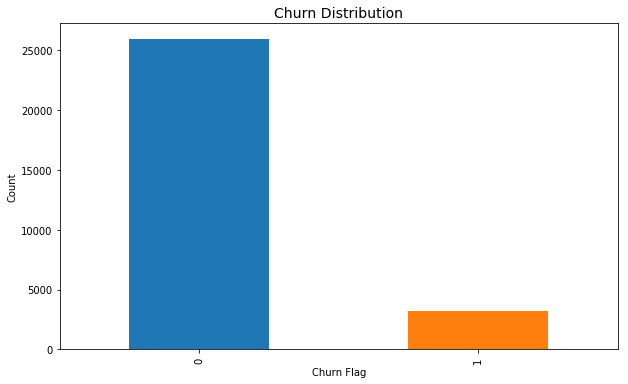

In [220]:
#Churn Data Distribution
plt.figure(figsize=(10,6))
df['churn_flag'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn Flag')
plt.title('Churn Distribution',fontsize=14)

## Mobile Number

In [221]:
#inspecting
df['mobile_number'].head(10)

0     7.000843e+09
7     7.000702e+09
8     7.001525e+09
21    7.002124e+09
23    7.000887e+09
33    7.000150e+09
38    7.000815e+09
40    7.000721e+09
47    7.000294e+09
52    7.002189e+09
Name: mobile_number, dtype: float64

In [222]:
#the data is identifer hence converting to string

df['mobile_number'] = df['mobile_number'].astype(str)

In [223]:
#inspecting
df['mobile_number'].head(10)

0     7000842753.0
7     7000701601.0
8     7001524846.0
21    7002124215.0
23    7000887461.0
33    7000149764.0
38    7000815202.0
40    7000721289.0
47    7000294396.0
52    7002188521.0
Name: mobile_number, dtype: object

In [224]:
df['mobile_number'].value_counts().sort_values(ascending = False).head()

7001996730.0    1
7002369406.0    1
7001212351.0    1
7001332650.0    1
7001048239.0    1
Name: mobile_number, dtype: int64

In [225]:
# identifer hence ignored for analysis

## Revenue per User - ARPU

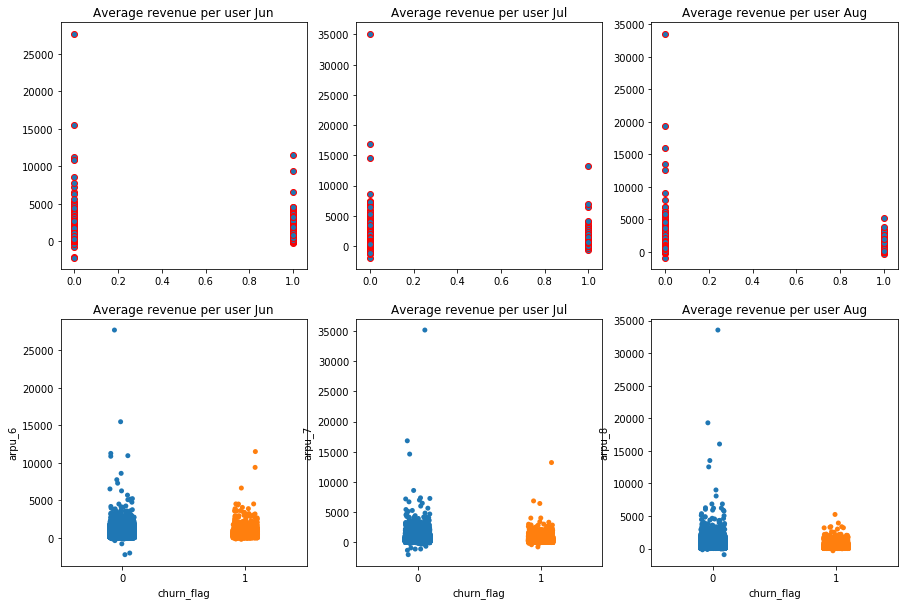

In [226]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 3, 1)
plt.title('Average revenue per user Jun')
plt.scatter(x='churn_flag',y='arpu_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Average revenue per user Jul')
plt.scatter(x='churn_flag',y='arpu_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Average revenue per user Aug')
plt.scatter(x='churn_flag',y='arpu_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Average revenue per user Jun')
sns.stripplot(x='churn_flag', y='arpu_6', data=df, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Average revenue per user Jul')
sns.stripplot(x='churn_flag', y='arpu_7', data=df, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Average revenue per user Aug')
sns.stripplot(x='churn_flag', y='arpu_8', data=df, edgecolor="gray")
plt.show()



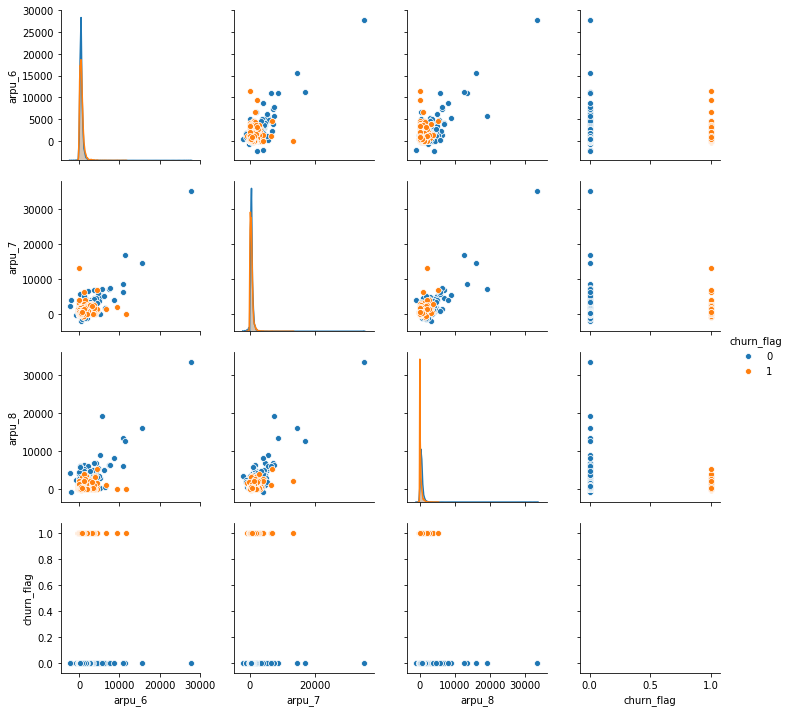

In [227]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')

In [228]:
# few rows have negative
print(len(df[df['arpu_6']<0]),"\n")
print(len(df[df['arpu_7']<0]),"\n")
print(len(df[df['arpu_8']<0]),"\n")

38 

50 

91 



In [229]:
# since the number of rows are less dropping them
df.drop(df[df['arpu_6']<0].index, inplace = True)
df.drop(df[df['arpu_7']<0].index, inplace = True)
df.drop(df[df['arpu_8']<0].index, inplace = True)


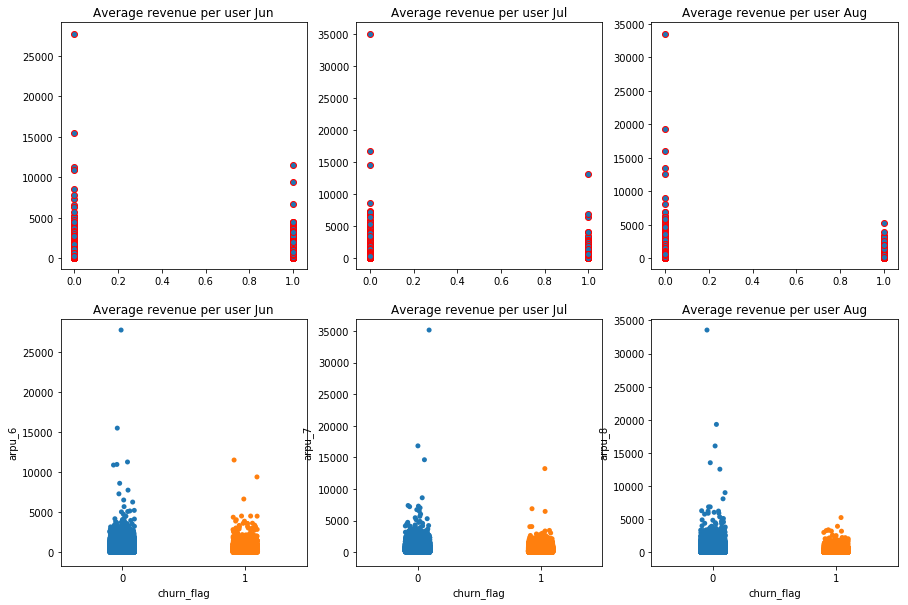

In [230]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 3, 1)
plt.title('Average revenue per user Jun')
plt.scatter(x='churn_flag',y='arpu_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Average revenue per user Jul')
plt.scatter(x='churn_flag',y='arpu_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Average revenue per user Aug')
plt.scatter(x='churn_flag',y='arpu_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Average revenue per user Jun')
sns.stripplot(x='churn_flag', y='arpu_6', data=df, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Average revenue per user Jul')
sns.stripplot(x='churn_flag', y='arpu_7', data=df, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Average revenue per user Aug')
sns.stripplot(x='churn_flag', y='arpu_8', data=df, edgecolor="gray")
plt.show()



## All calls in same network - onnet_mou

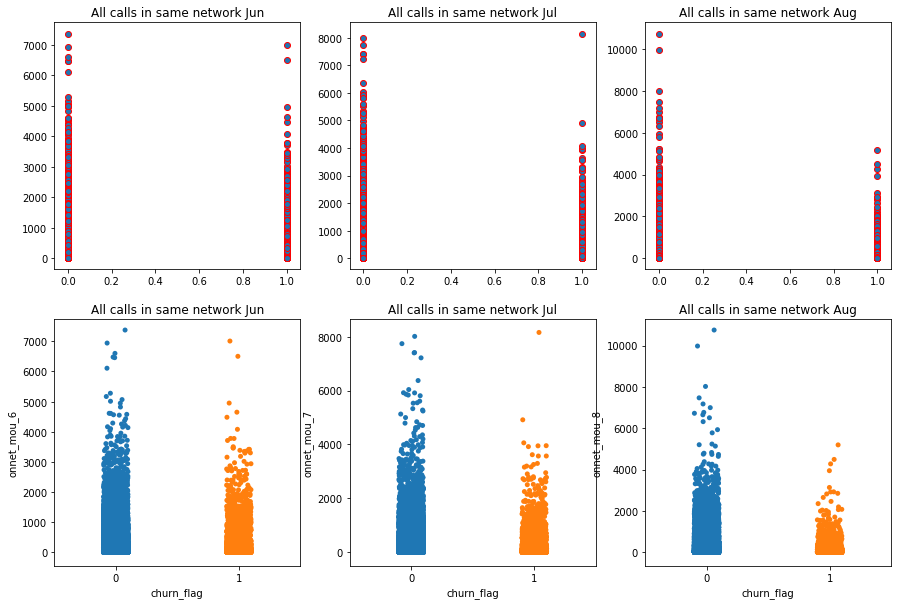

In [231]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 3, 1)
plt.title('All calls in same network Jun')
plt.scatter(x='churn_flag',y='onnet_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('All calls in same network Jul')
plt.scatter(x='churn_flag',y='onnet_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('All calls in same network Aug')
plt.scatter(x='churn_flag',y='onnet_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('All calls in same network Jun')
sns.stripplot(x='churn_flag', y='onnet_mou_6', data=df, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('All calls in same network Jul')
sns.stripplot(x='churn_flag', y='onnet_mou_7', data=df, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('All calls in same network Aug')
sns.stripplot(x='churn_flag', y='onnet_mou_8', data=df, edgecolor="gray")
plt.show()



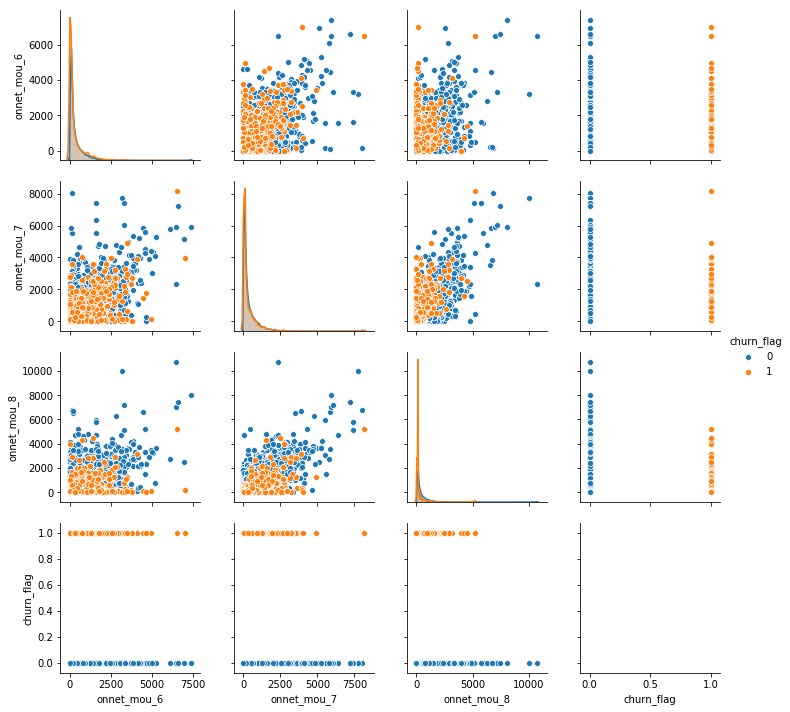

In [232]:
sns.pairplot(data=df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')

## All calls outside same network - Offnet_mou

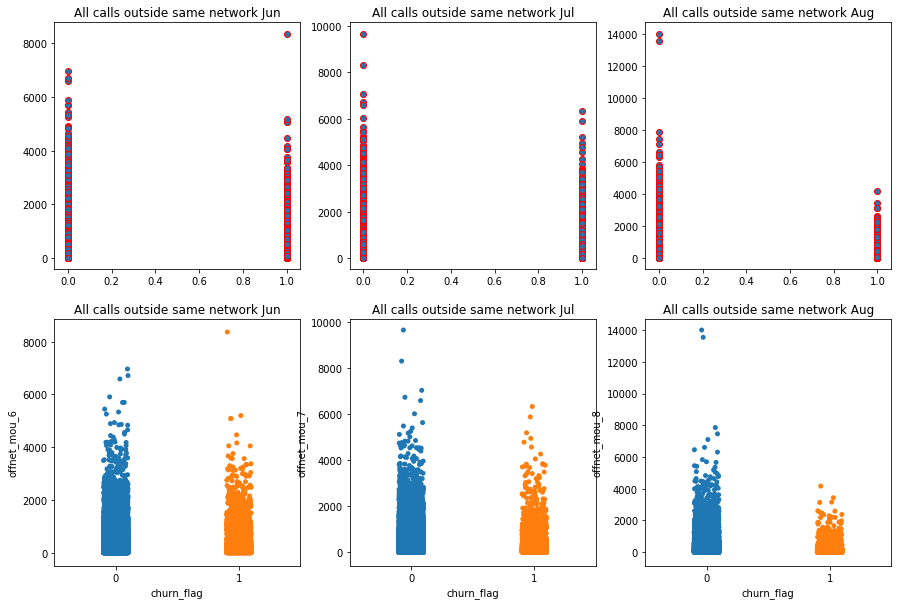

In [233]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 3, 1)
plt.title('All calls outside same network Jun')
plt.scatter(x='churn_flag',y='offnet_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('All calls outside same network Jul')
plt.scatter(x='churn_flag',y='offnet_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('All calls outside same network Aug')
plt.scatter(x='churn_flag',y='offnet_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('All calls outside same network Jun')
sns.stripplot(x='churn_flag', y='offnet_mou_6', data=df, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('All calls outside same network Jul')
sns.stripplot(x='churn_flag', y='offnet_mou_7', data=df, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('All calls outside same network Aug')
sns.stripplot(x='churn_flag', y='offnet_mou_8', data=df, edgecolor="gray")
plt.show()


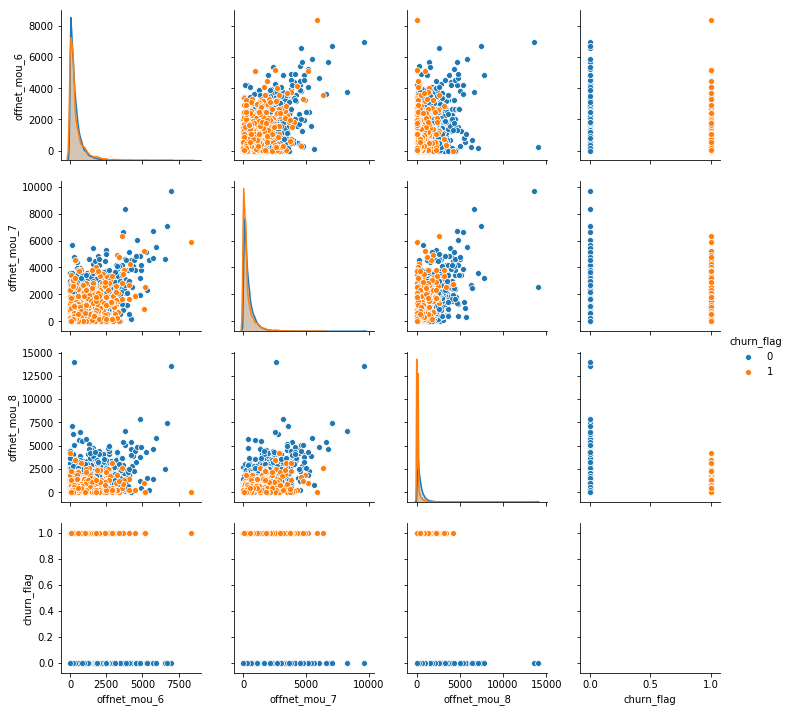

In [234]:
sns.pairplot(data=df[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')

## Customer incoming roaming - roam_ic_mou

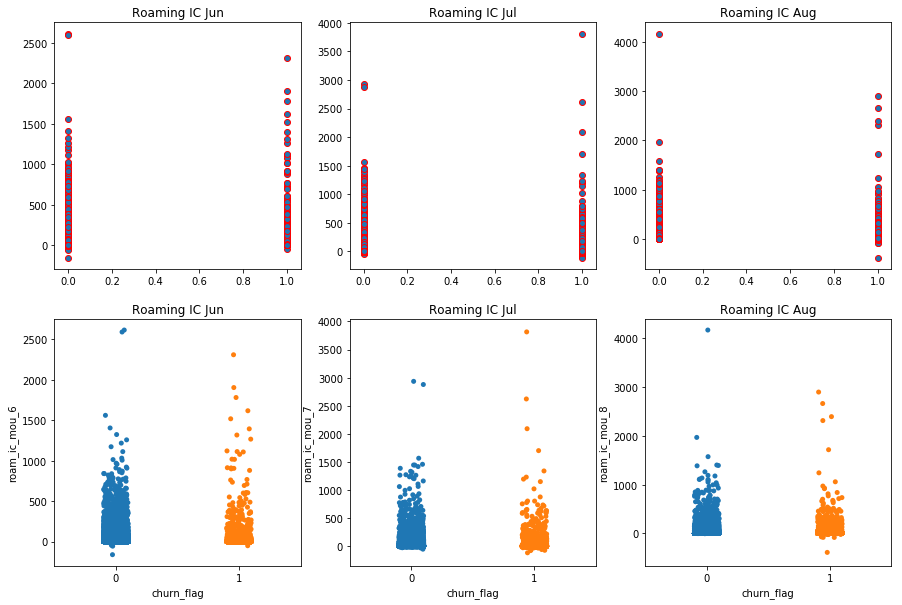

In [235]:
plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Roaming IC Jun')
plt.scatter(x='churn_flag',y='roam_ic_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Roaming IC Jul')
plt.scatter(x='churn_flag',y='roam_ic_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Roaming IC Aug')
plt.scatter(x='churn_flag',y='roam_ic_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Roaming IC Jun')
sns.stripplot(x='churn_flag', y='roam_ic_mou_6', data=df, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Roaming IC Jul')
sns.stripplot(x='churn_flag', y='roam_ic_mou_7', data=df, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Roaming IC Aug')
sns.stripplot(x='churn_flag', y='roam_ic_mou_8', data=df,  edgecolor="gray")
plt.show()



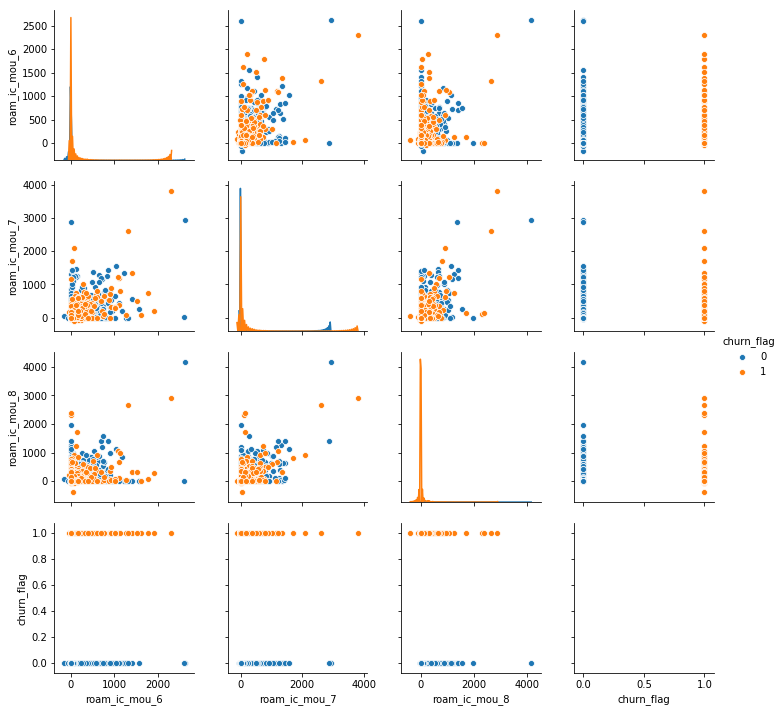

In [236]:
sns.pairplot(data=df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag')

## Customer outgoing roaming - roam_og_mou

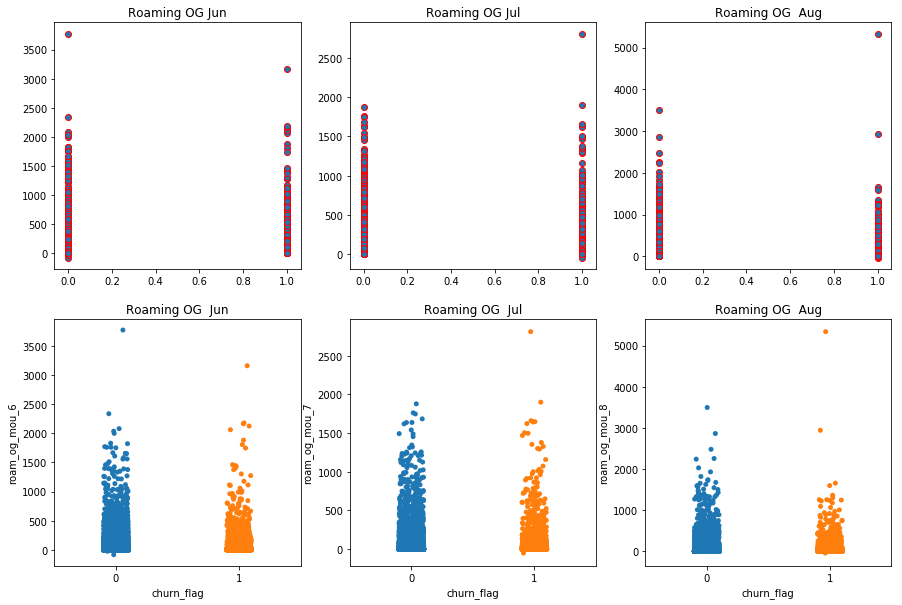

In [237]:
plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Roaming OG Jun')
plt.scatter(x='churn_flag',y='roam_og_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Roaming OG Jul')
plt.scatter(x='churn_flag',y='roam_og_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Roaming OG  Aug')
plt.scatter(x='churn_flag',y='roam_og_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Roaming OG  Jun')
sns.stripplot(x='churn_flag', y='roam_og_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Roaming OG  Jul')
sns.stripplot(x='churn_flag', y='roam_og_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Roaming OG  Aug')
sns.stripplot(x='churn_flag', y='roam_og_mou_8', data=df,  edgecolor="gray")
plt.show()



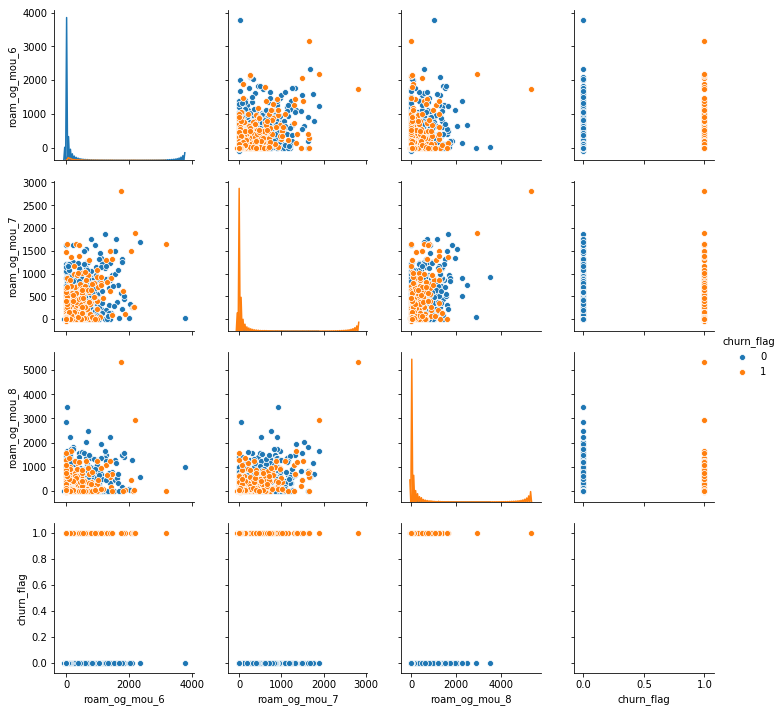

In [238]:
sns.pairplot(data=df[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn_flag']],hue='churn_flag')

## Within the circle outgoing calls - loc_og_mou

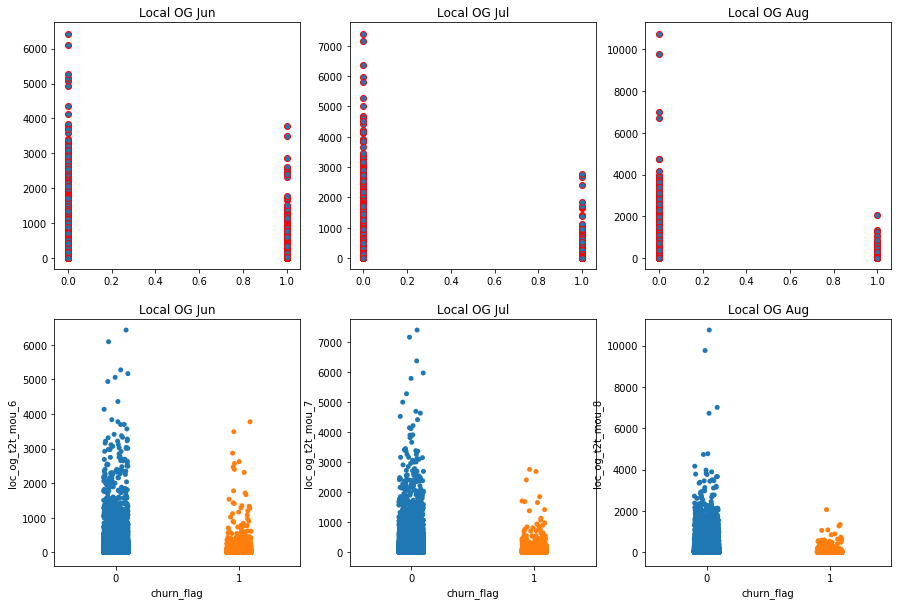

In [239]:
plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Local OG Jun')
plt.scatter(x='churn_flag',y='loc_og_t2t_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Local OG Jul')
plt.scatter(x='churn_flag',y='loc_og_t2t_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Local OG Aug')
plt.scatter(x='churn_flag',y='loc_og_t2t_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Local OG Jun')
sns.stripplot(x='churn_flag', y='loc_og_t2t_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Local OG Jul')
sns.stripplot(x='churn_flag', y='loc_og_t2t_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Local OG Aug')
sns.stripplot(x='churn_flag', y='loc_og_t2t_mou_8', data=df,  edgecolor="gray")
plt.show()



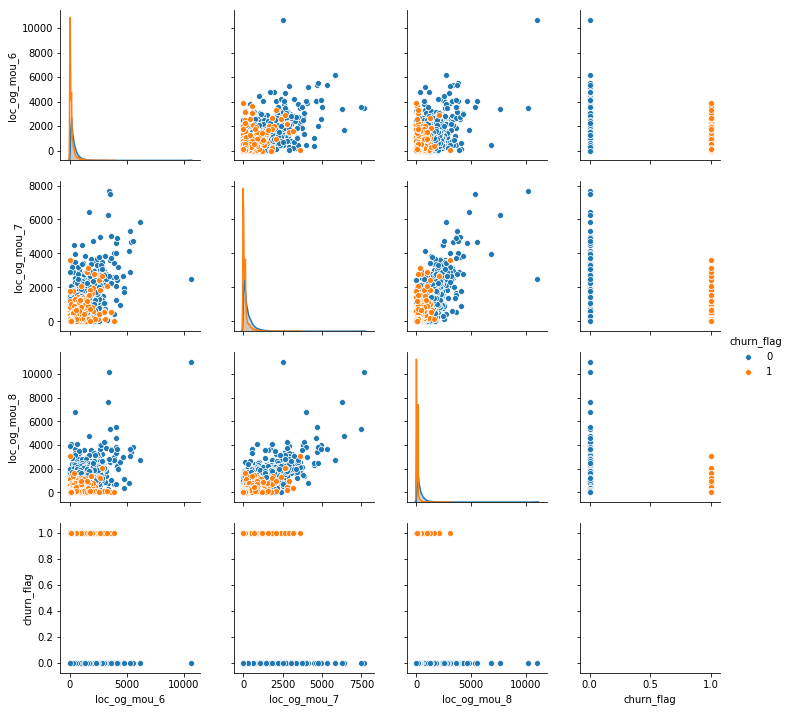

In [240]:
sns.pairplot(data=df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag')

## Outside calling circle/zone calls - std_og_mou

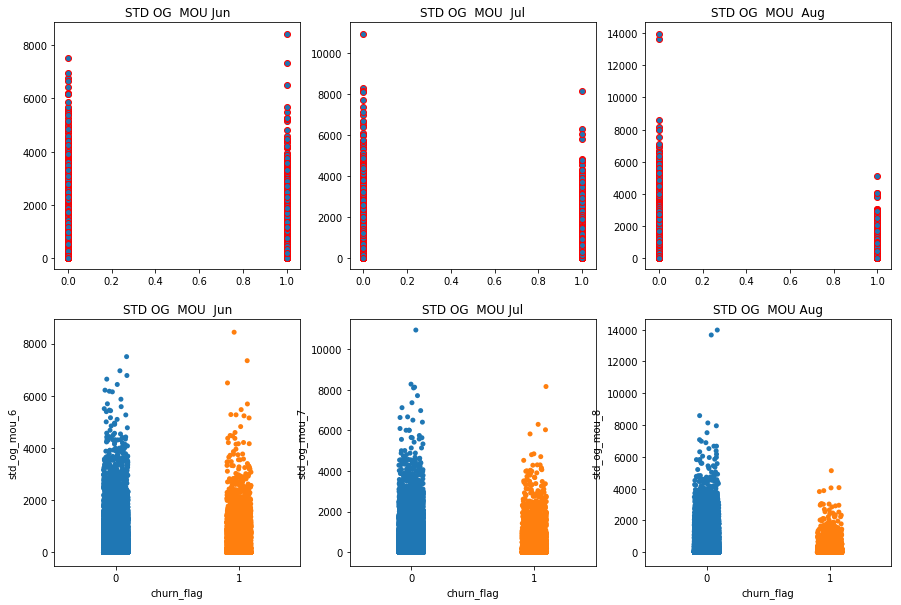

In [241]:
#std_og_mou_6
#std_og_t2t_mou_6

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('STD OG  MOU Jun')
plt.scatter(x='churn_flag',y='std_og_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('STD OG  MOU  Jul')
plt.scatter(x='churn_flag',y='std_og_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('STD OG  MOU  Aug')
plt.scatter(x='churn_flag',y='std_og_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('STD OG  MOU  Jun')
sns.stripplot(x='churn_flag', y='std_og_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('STD OG  MOU Jul')
sns.stripplot(x='churn_flag', y='std_og_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('STD OG  MOU Aug')
sns.stripplot(x='churn_flag', y='std_og_mou_8', data=df,  edgecolor="gray")
plt.show()



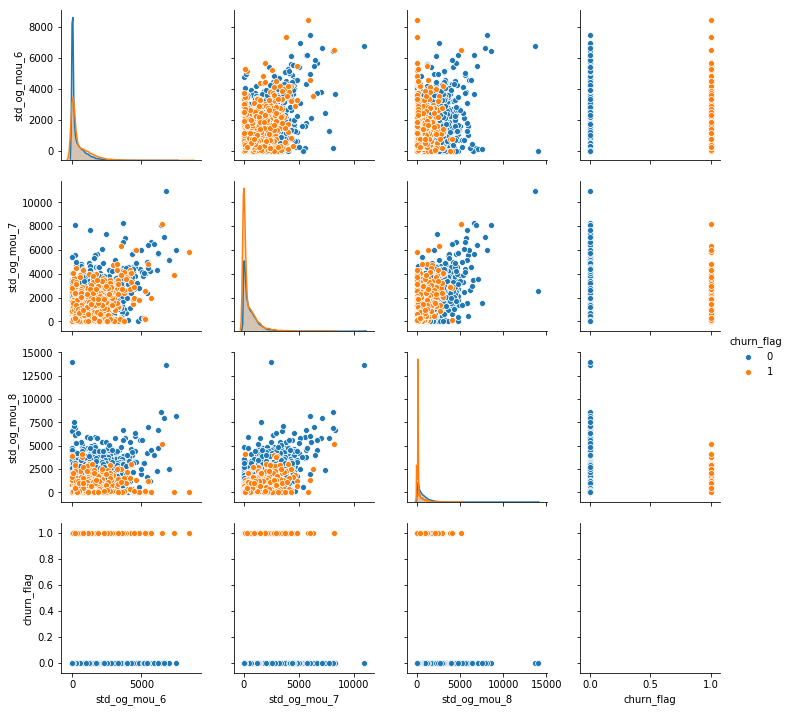

In [242]:
sns.pairplot(data=df[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn_flag']],hue='churn_flag')

## - international calling - isd_og

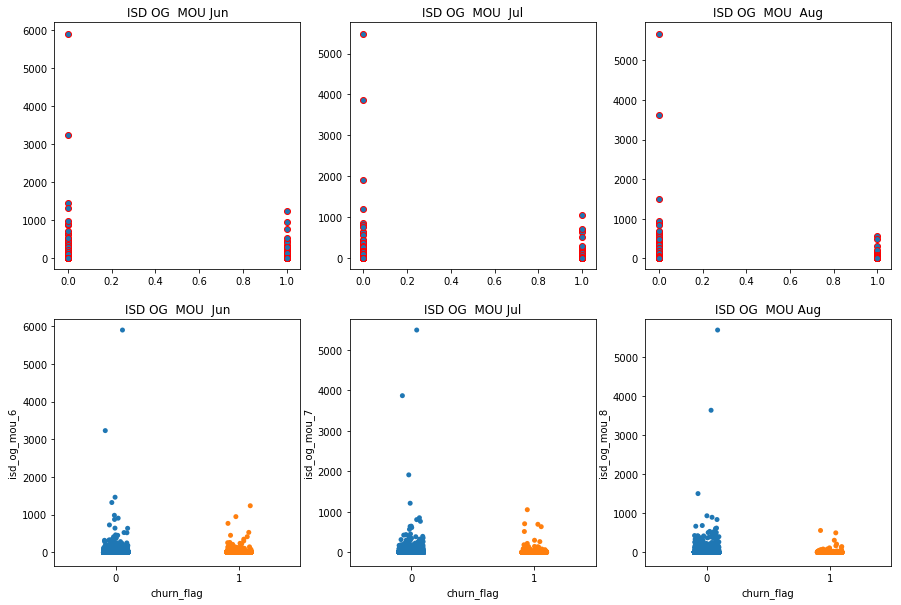

In [243]:
#std_og_mou_6
#std_og_t2t_mou_6

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('ISD OG  MOU Jun')
plt.scatter(x='churn_flag',y='isd_og_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('ISD OG  MOU  Jul')
plt.scatter(x='churn_flag',y='isd_og_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('ISD OG  MOU  Aug')
plt.scatter(x='churn_flag',y='isd_og_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('ISD OG  MOU  Jun')
sns.stripplot(x='churn_flag', y='isd_og_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('ISD OG  MOU Jul')
sns.stripplot(x='churn_flag', y='isd_og_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('ISD OG  MOU Aug')
sns.stripplot(x='churn_flag', y='isd_og_mou_8', data=df,  edgecolor="gray")
plt.show()



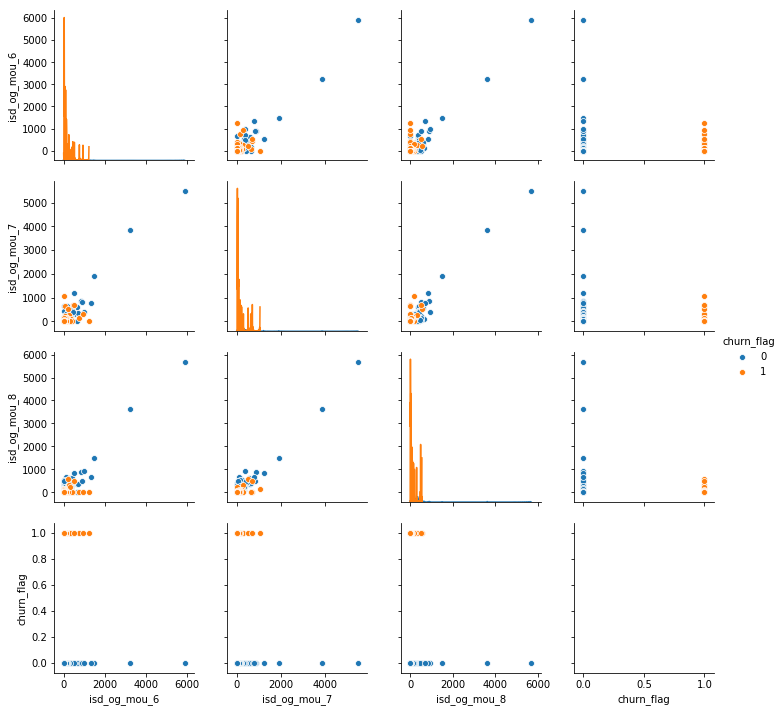

In [244]:
sns.pairplot(data=df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn_flag']],hue='churn_flag')

## - STD outgoing within Operator - std_og_t2t

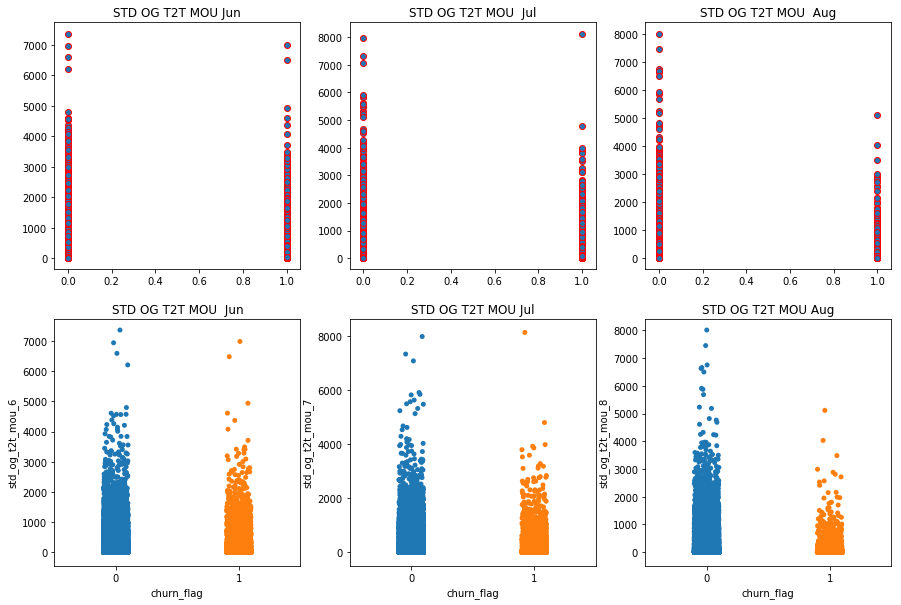

In [245]:
#std_og_t2t_mou_6

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('STD OG T2T MOU Jun')
plt.scatter(x='churn_flag',y='std_og_t2t_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('STD OG T2T MOU  Jul')
plt.scatter(x='churn_flag',y='std_og_t2t_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('STD OG T2T MOU  Aug')
plt.scatter(x='churn_flag',y='std_og_t2t_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('STD OG T2T MOU  Jun')
sns.stripplot(x='churn_flag', y='std_og_t2t_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('STD OG T2T MOU Jul')
sns.stripplot(x='churn_flag', y='std_og_t2t_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('STD OG T2T MOU Aug')
sns.stripplot(x='churn_flag', y='std_og_t2t_mou_8', data=df,  edgecolor="gray")
plt.show()



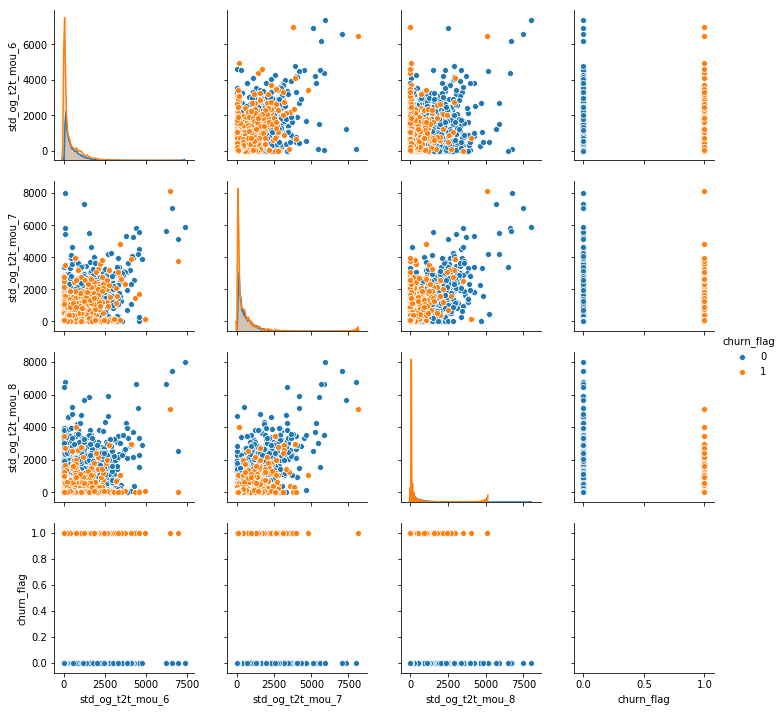

In [246]:
sns.pairplot(data=df[['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','churn_flag']],hue='churn_flag')

## STD outgoing other Operator mobile - std_og_t2m

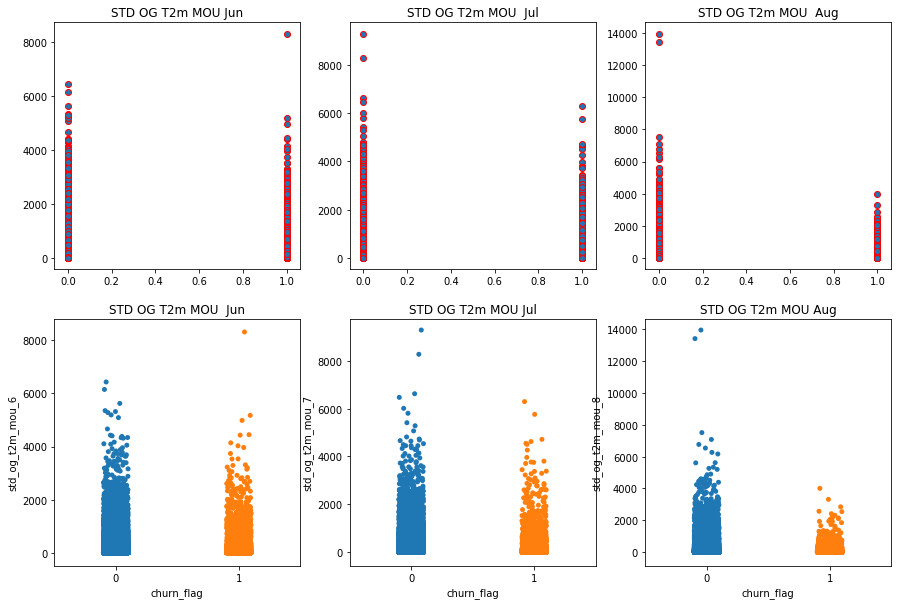

In [247]:
#std_og_t2t_mou_6

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('STD OG T2m MOU Jun')
plt.scatter(x='churn_flag',y='std_og_t2m_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('STD OG T2m MOU  Jul')
plt.scatter(x='churn_flag',y='std_og_t2m_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('STD OG T2m MOU  Aug')
plt.scatter(x='churn_flag',y='std_og_t2m_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('STD OG T2m MOU  Jun')
sns.stripplot(x='churn_flag', y='std_og_t2m_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('STD OG T2m MOU Jul')
sns.stripplot(x='churn_flag', y='std_og_t2m_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('STD OG T2m MOU Aug')
sns.stripplot(x='churn_flag', y='std_og_t2m_mou_8', data=df,  edgecolor="gray")
plt.show()



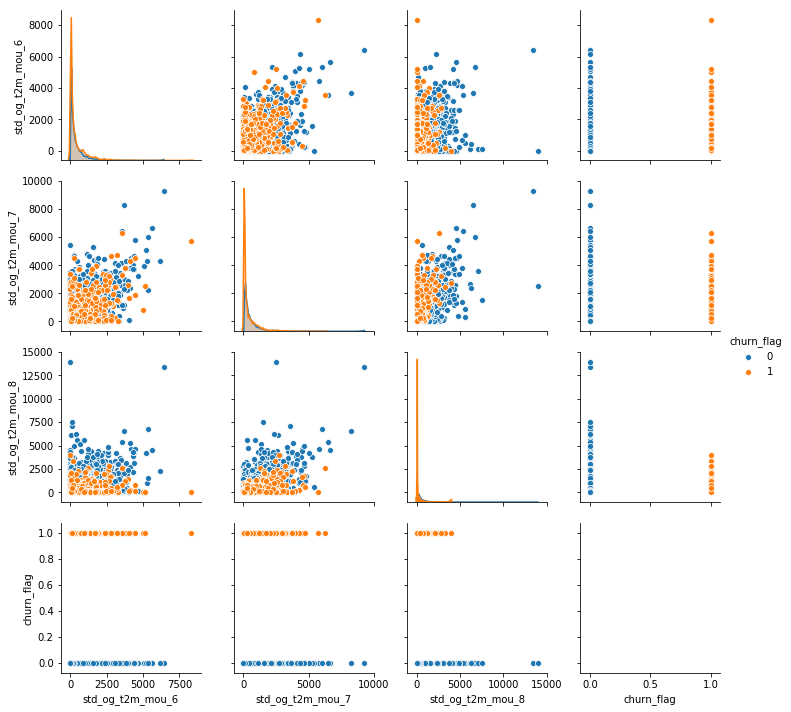

In [248]:
sns.pairplot(data=df[['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','churn_flag']],hue='churn_flag')

## STD outgoing Operator fixed line - std_og_t2f

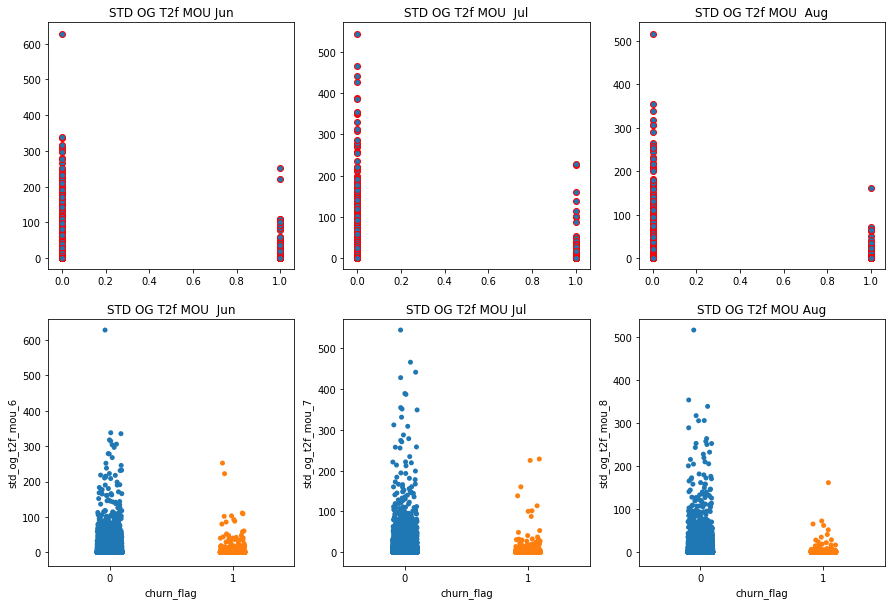

In [249]:
#std_og_t2t_mou_6

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('STD OG T2f MOU Jun')
plt.scatter(x='churn_flag',y='std_og_t2f_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('STD OG T2f MOU  Jul')
plt.scatter(x='churn_flag',y='std_og_t2f_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('STD OG T2f MOU  Aug')
plt.scatter(x='churn_flag',y='std_og_t2f_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('STD OG T2f MOU  Jun')
sns.stripplot(x='churn_flag', y='std_og_t2f_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('STD OG T2f MOU Jul')
sns.stripplot(x='churn_flag', y='std_og_t2f_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('STD OG T2f MOU Aug')
sns.stripplot(x='churn_flag', y='std_og_t2f_mou_8', data=df,  edgecolor="gray")
plt.show()



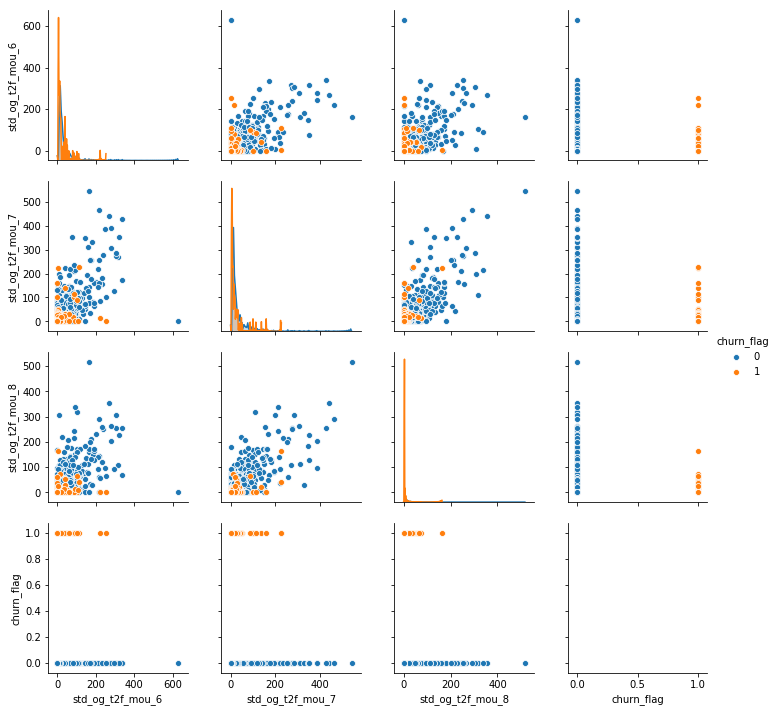

In [250]:
sns.pairplot(data=df[['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','churn_flag']],hue='churn_flag')

## International Calling - ISD OG MOU

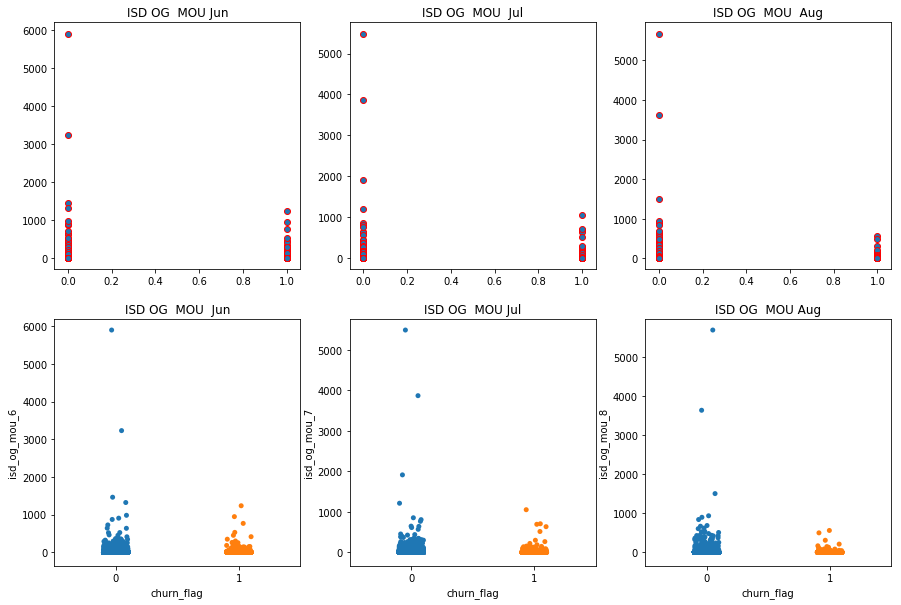

In [251]:
#std_og_mou_6
#std_og_t2t_mou_6

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('ISD OG  MOU Jun')
plt.scatter(x='churn_flag',y='isd_og_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('ISD OG  MOU  Jul')
plt.scatter(x='churn_flag',y='isd_og_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('ISD OG  MOU  Aug')
plt.scatter(x='churn_flag',y='isd_og_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('ISD OG  MOU  Jun')
sns.stripplot(x='churn_flag', y='isd_og_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('ISD OG  MOU Jul')
sns.stripplot(x='churn_flag', y='isd_og_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('ISD OG  MOU Aug')
sns.stripplot(x='churn_flag', y='isd_og_mou_8', data=df,  edgecolor="gray")
plt.show()



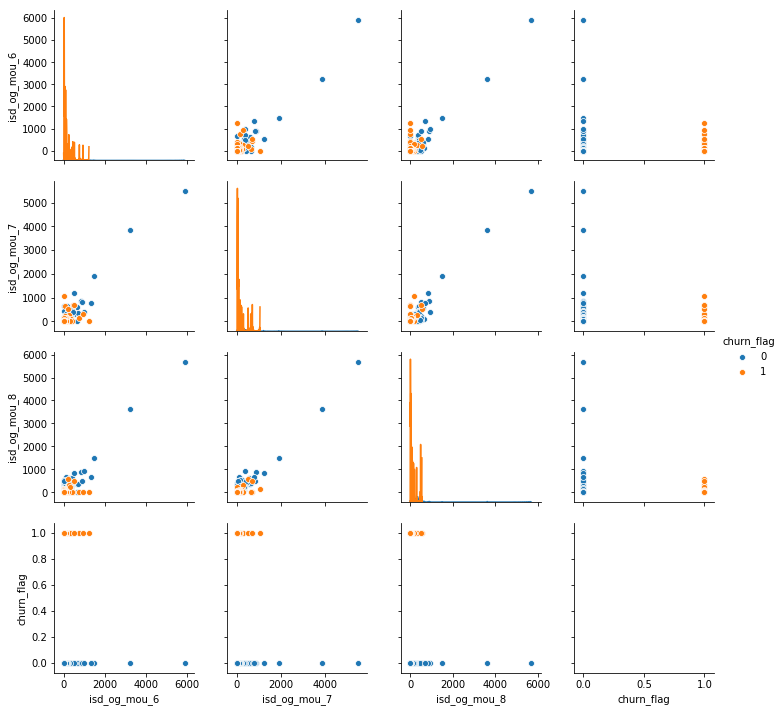

In [252]:
sns.pairplot(data=df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn_flag']],hue='churn_flag')

## Special Calls Outgoing - spl_og_mou

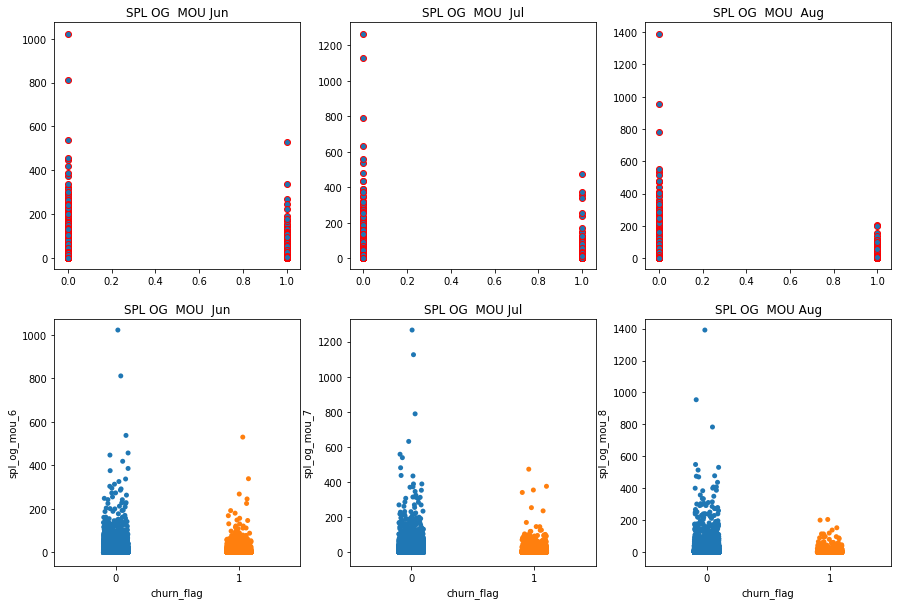

In [253]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('SPL OG  MOU Jun')
plt.scatter(x='churn_flag',y='spl_og_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('SPL OG  MOU  Jul')
plt.scatter(x='churn_flag',y='spl_og_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('SPL OG  MOU  Aug')
plt.scatter(x='churn_flag',y='spl_og_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('SPL OG  MOU  Jun')
sns.stripplot(x='churn_flag', y='spl_og_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('SPL OG  MOU Jul')
sns.stripplot(x='churn_flag', y='spl_og_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('SPL OG  MOU Aug')
sns.stripplot(x='churn_flag', y='spl_og_mou_8', data=df,  edgecolor="gray")
plt.show()



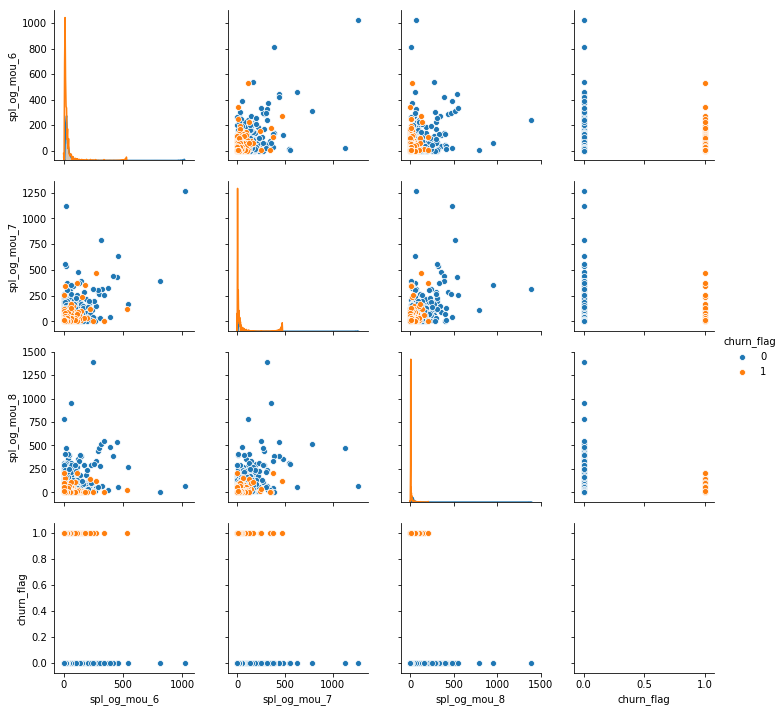

In [254]:
sns.pairplot(data=df[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','churn_flag']],hue='churn_flag')

## Other Outgoing . - og_others

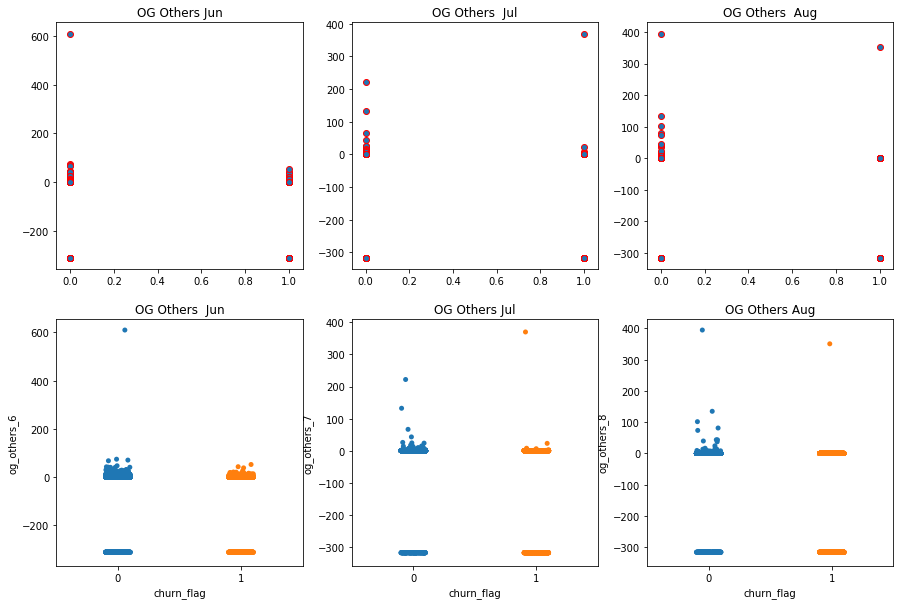

In [255]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('OG Others Jun')
plt.scatter(x='churn_flag',y='og_others_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('OG Others  Jul')
plt.scatter(x='churn_flag',y='og_others_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('OG Others  Aug')
plt.scatter(x='churn_flag',y='og_others_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('OG Others  Jun')
sns.stripplot(x='churn_flag', y='og_others_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('OG Others Jul')
sns.stripplot(x='churn_flag', y='og_others_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('OG Others Aug')
sns.stripplot(x='churn_flag', y='og_others_8', data=df,  edgecolor="gray")
plt.show()



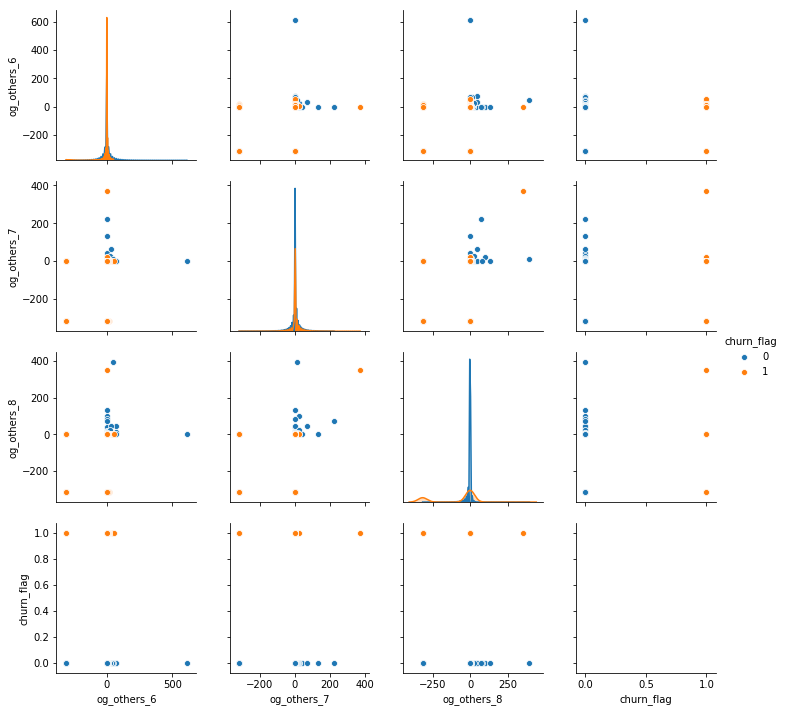

In [256]:
sns.pairplot(data=df[['og_others_6','og_others_7','og_others_8','churn_flag']],hue='churn_flag')

In [257]:
# this field cannot be negative, identifying number of rows with value of 0

print(len(df[df['og_others_6'] < 0]),"\n")
print(len(df[df['og_others_7'] < 0]),"\n")
print(len(df[df['og_others_8'] < 0]),"\n")


507 

497 

1080 



In [258]:
#replacing less than 0 with zero
df[df['og_others_6'] < 0] = 0
df[df['og_others_7'] < 0] = 0
df[df['og_others_8'] < 0] = 0

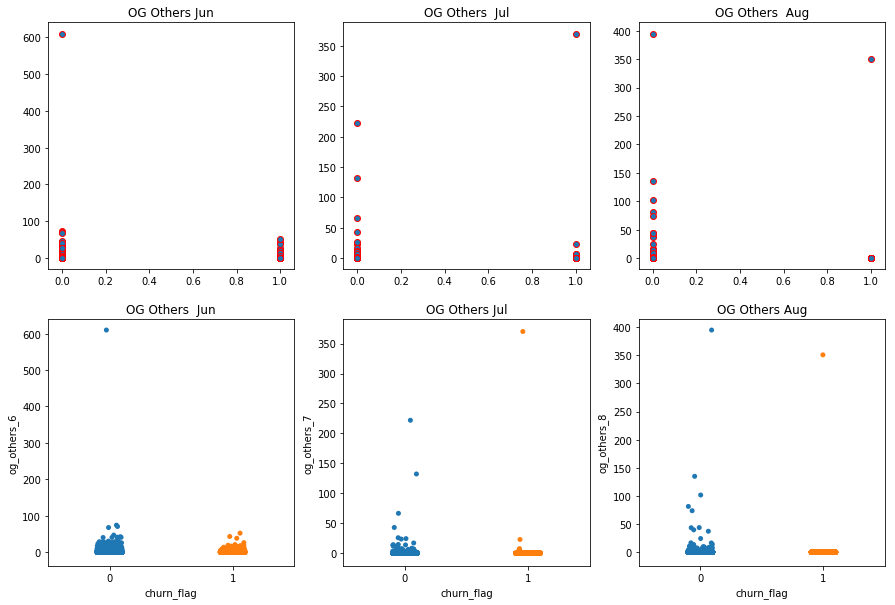

In [259]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('OG Others Jun')
plt.scatter(x='churn_flag',y='og_others_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('OG Others  Jul')
plt.scatter(x='churn_flag',y='og_others_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('OG Others  Aug')
plt.scatter(x='churn_flag',y='og_others_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('OG Others  Jun')
sns.stripplot(x='churn_flag', y='og_others_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('OG Others Jul')
sns.stripplot(x='churn_flag', y='og_others_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('OG Others Aug')
sns.stripplot(x='churn_flag', y='og_others_8', data=df,  edgecolor="gray")
plt.show()



## All outgoing calls by the customer - totalog

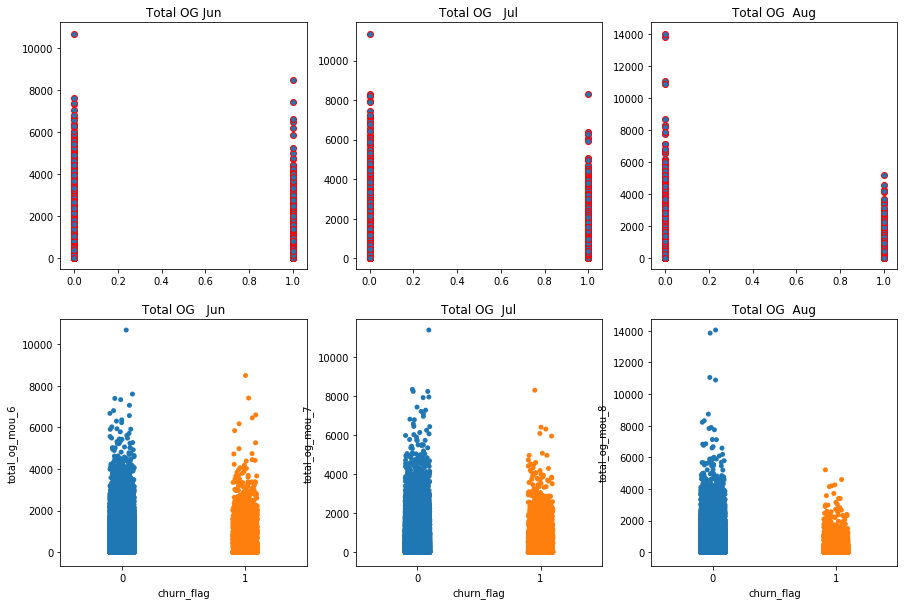

In [260]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Total OG Jun')
plt.scatter(x='churn_flag',y='total_og_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Total OG   Jul')
plt.scatter(x='churn_flag',y='total_og_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Total OG  Aug')
plt.scatter(x='churn_flag',y='total_og_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Total OG   Jun')
sns.stripplot(x='churn_flag', y='total_og_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Total OG  Jul')
sns.stripplot(x='churn_flag', y='total_og_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Total OG  Aug')
sns.stripplot(x='churn_flag', y='total_og_mou_8', data=df,  edgecolor="gray")
plt.show()



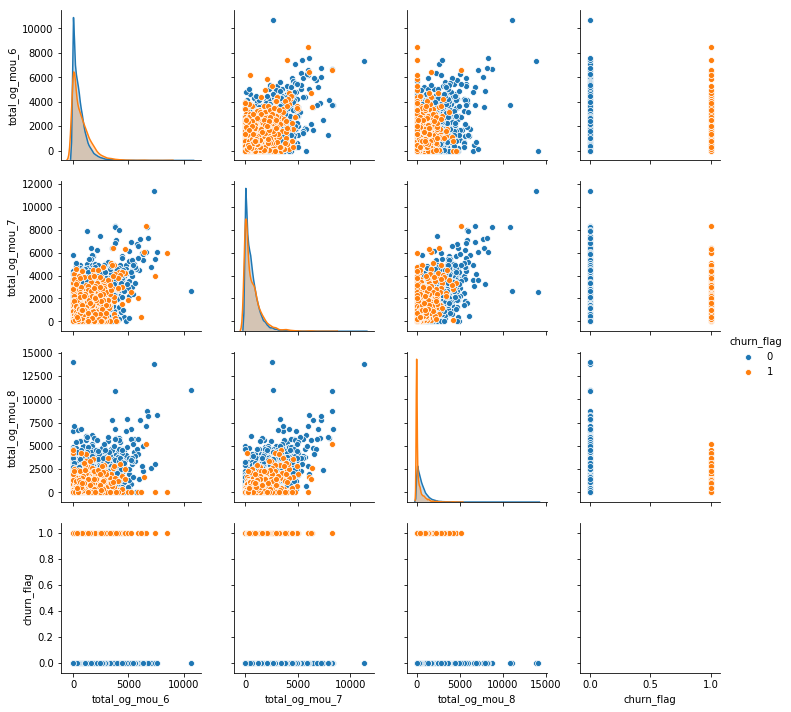

In [261]:

sns.pairplot(data=df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag')

## incoming local calls - locic

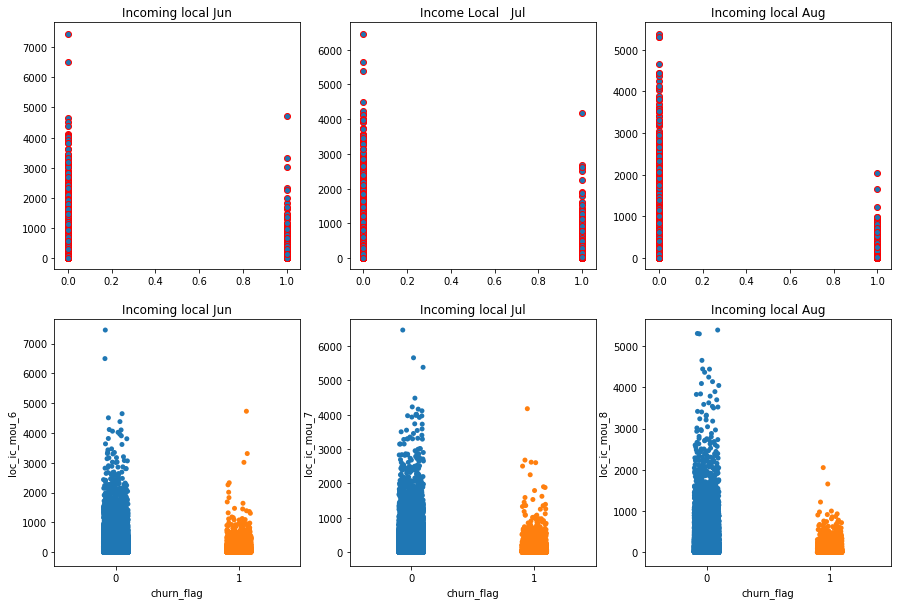

In [262]:

plt.figure(figsize=(15, 10))

# subplot 1

plt.subplot(2, 3, 1)
plt.title('Incoming local Jun')
plt.scatter(x='churn_flag',y='loc_ic_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Income Local   Jul')
plt.scatter(x='churn_flag',y='loc_ic_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Incoming local Aug')
plt.scatter(x='churn_flag',y='loc_ic_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Incoming local Jun')
sns.stripplot(x='churn_flag', y='loc_ic_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Incoming local Jul')
sns.stripplot(x='churn_flag', y='loc_ic_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Incoming local Aug')
sns.stripplot(x='churn_flag', y='loc_ic_mou_8', data=df,  edgecolor="gray")
plt.show()



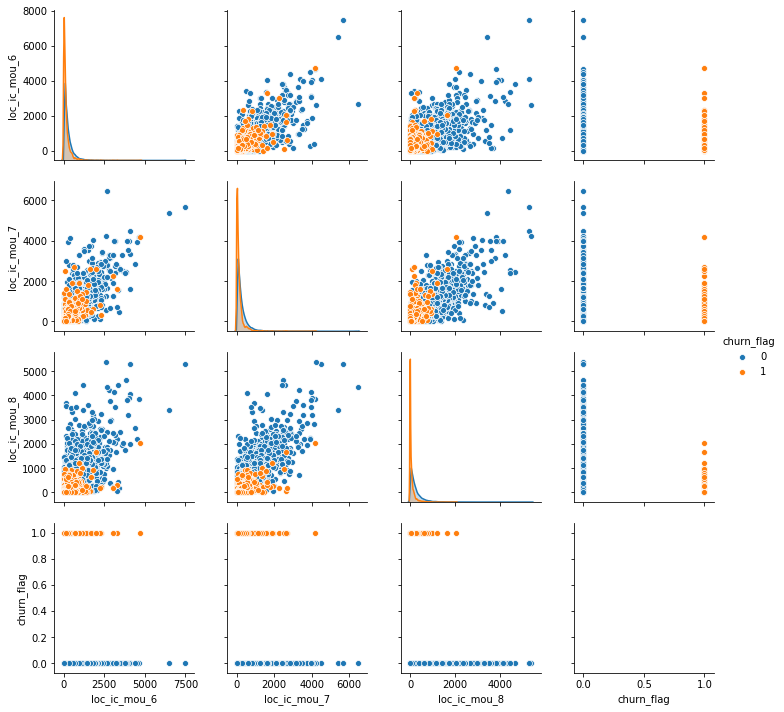

In [263]:
sns.pairplot(data=df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn_flag']],hue='churn_flag')

## Outside circle incoming calls - std_ic

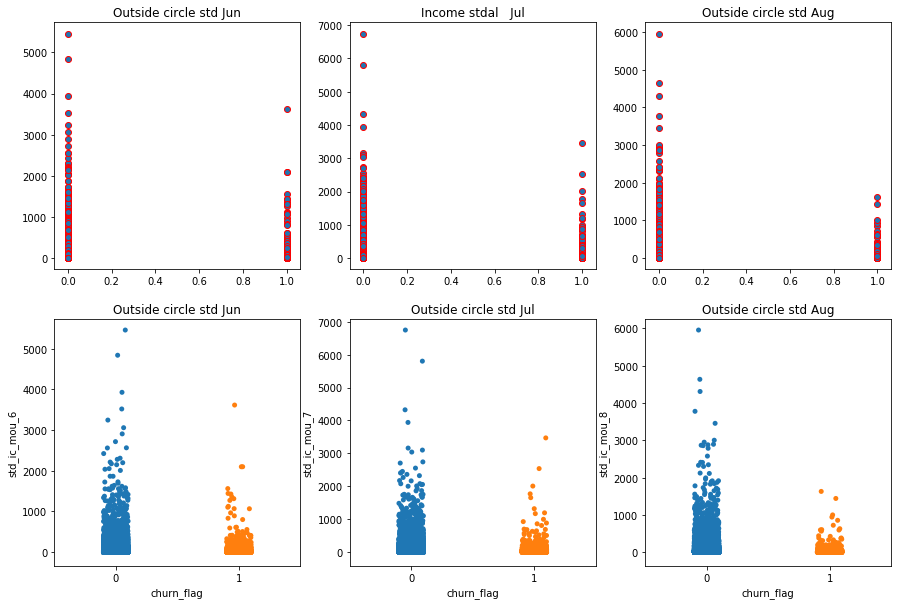

In [264]:

plt.figure(figsize=(15, 10))

# subplot 1

plt.subplot(2, 3, 1)
plt.title('Outside circle std Jun')
plt.scatter(x='churn_flag',y='std_ic_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Income stdal   Jul')
plt.scatter(x='churn_flag',y='std_ic_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Outside circle std Aug')
plt.scatter(x='churn_flag',y='std_ic_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Outside circle std Jun')
sns.stripplot(x='churn_flag', y='std_ic_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Outside circle std Jul')
sns.stripplot(x='churn_flag', y='std_ic_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Outside circle std Aug')
sns.stripplot(x='churn_flag', y='std_ic_mou_8', data=df,  edgecolor="gray")
plt.show()



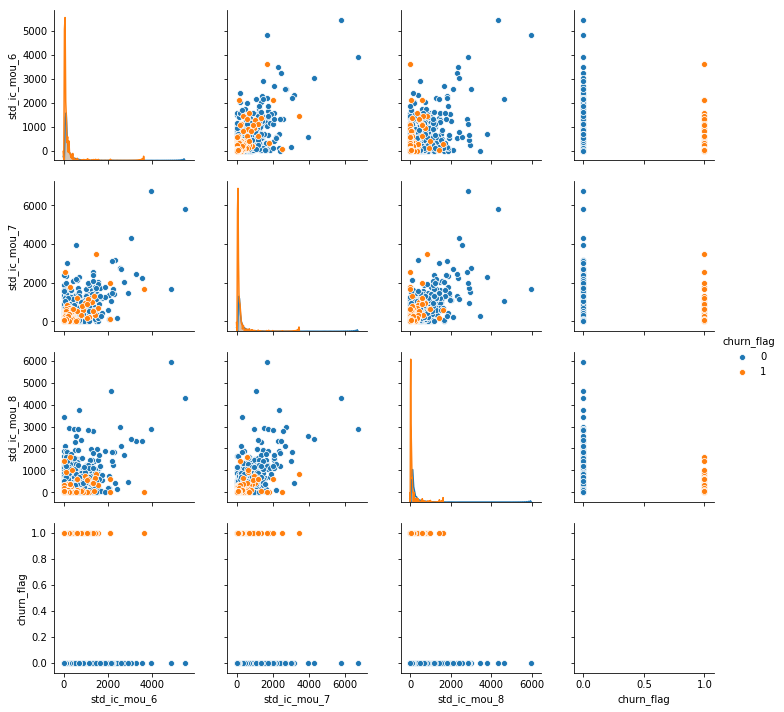

In [265]:
sns.pairplot(data=df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag')

## All incoming calls received by a person - total_ic_

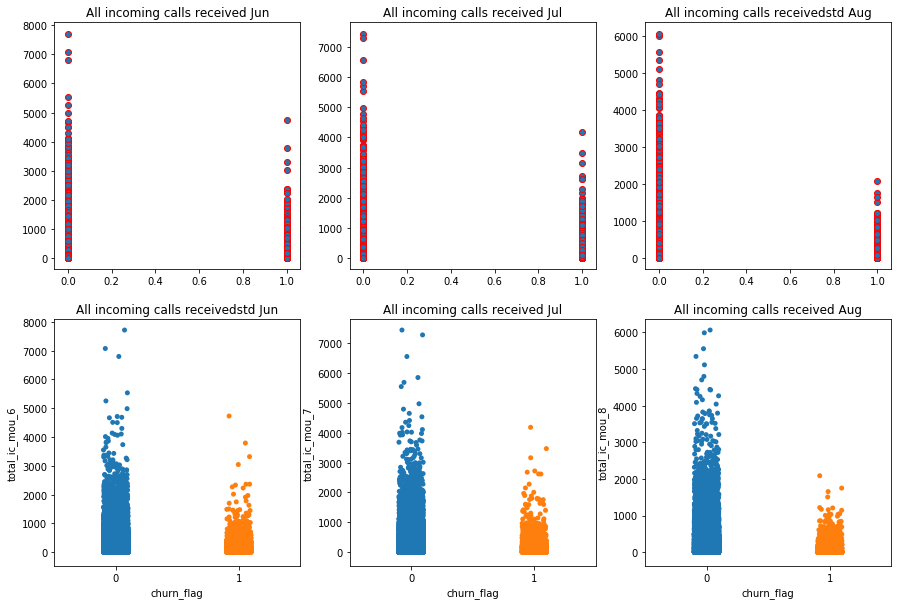

In [266]:

plt.figure(figsize=(15, 10))

# subplot 1

plt.subplot(2, 3, 1)
plt.title('All incoming calls received Jun')
plt.scatter(x='churn_flag',y='total_ic_mou_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('All incoming calls received Jul')
plt.scatter(x='churn_flag',y='total_ic_mou_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('All incoming calls receivedstd Aug')
plt.scatter(x='churn_flag',y='total_ic_mou_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('All incoming calls receivedstd Jun')
sns.stripplot(x='churn_flag', y='total_ic_mou_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('All incoming calls received Jul')
sns.stripplot(x='churn_flag', y='total_ic_mou_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('All incoming calls received Aug')
sns.stripplot(x='churn_flag', y='total_ic_mou_8', data=df,  edgecolor="gray")
plt.show()



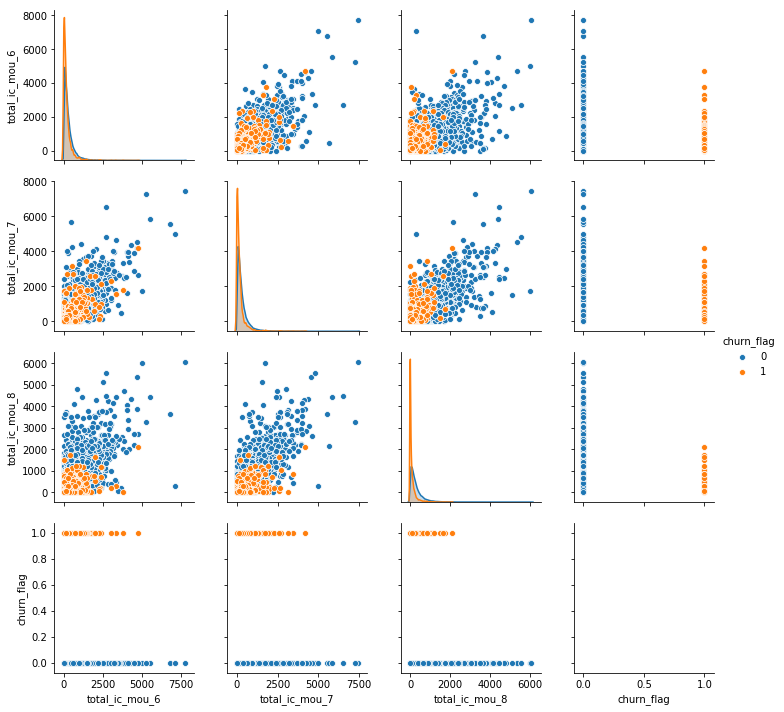

In [267]:
sns.pairplot(data=df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag')

## total_rechnum (Number of times a subscriber recharged his mobile

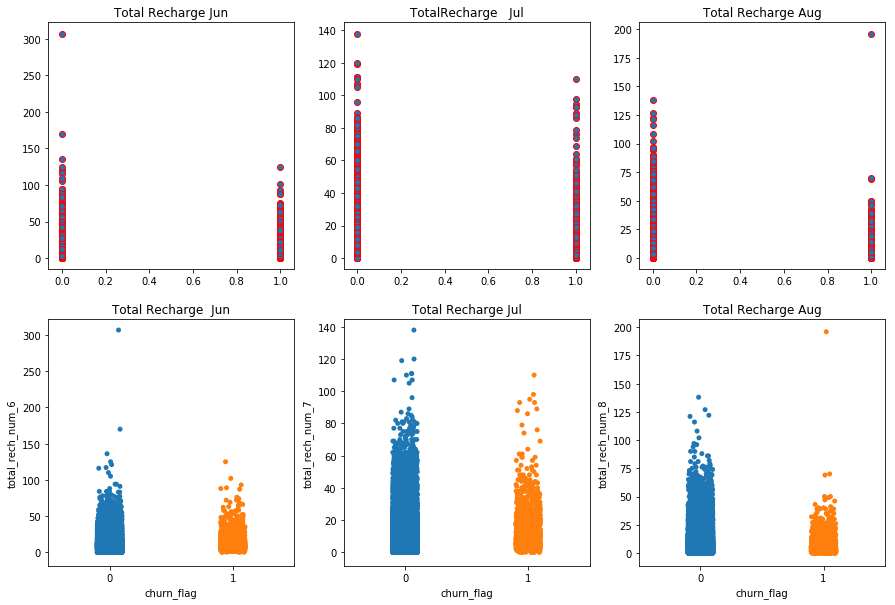

In [268]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Total Recharge Jun')
plt.scatter(x='churn_flag',y='total_rech_num_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('TotalRecharge   Jul')
plt.scatter(x='churn_flag',y='total_rech_num_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Total Recharge Aug')
plt.scatter(x='churn_flag',y='total_rech_num_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Total Recharge  Jun')
sns.stripplot(x='churn_flag', y='total_rech_num_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Total Recharge Jul')
sns.stripplot(x='churn_flag', y='total_rech_num_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Total Recharge Aug')
sns.stripplot(x='churn_flag', y='total_rech_num_8', data=df,  edgecolor="gray")
plt.show()



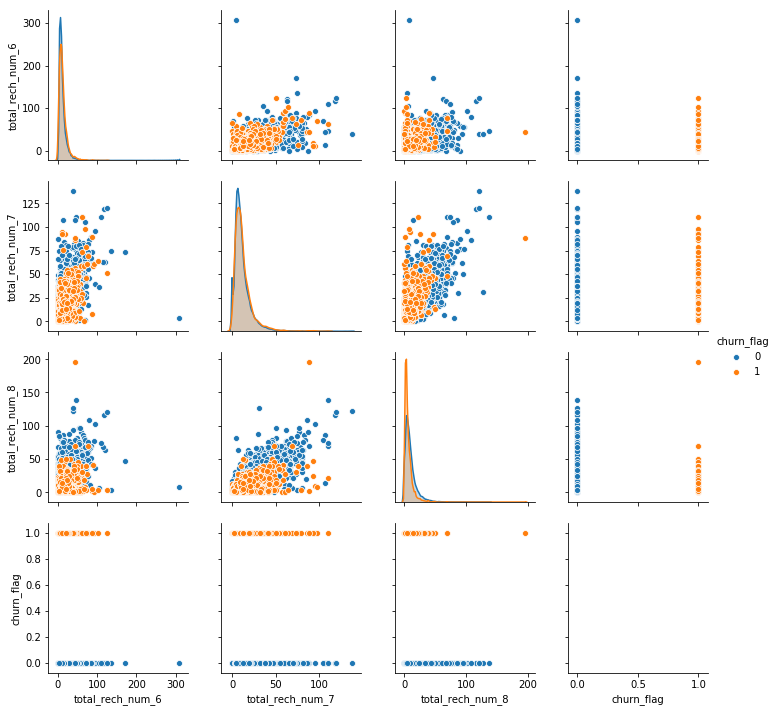

In [269]:

sns.pairplot(data=df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')

## total_rechamt Total recharge amount in a particular month

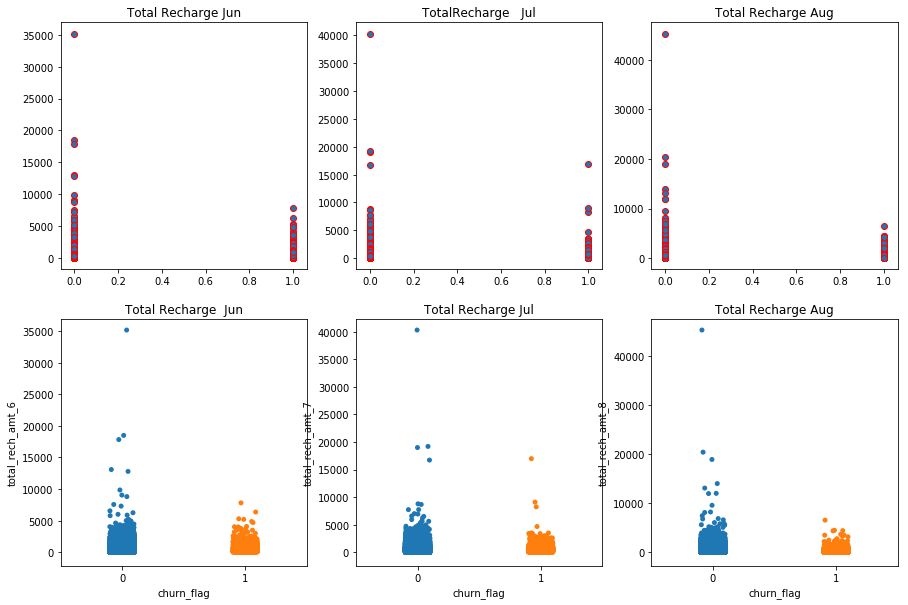

In [270]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Total Recharge Jun')
plt.scatter(x='churn_flag',y='total_rech_amt_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('TotalRecharge   Jul')
plt.scatter(x='churn_flag',y='total_rech_amt_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Total Recharge Aug')
plt.scatter(x='churn_flag',y='total_rech_amt_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Total Recharge  Jun')
sns.stripplot(x='churn_flag', y='total_rech_amt_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Total Recharge Jul')
sns.stripplot(x='churn_flag', y='total_rech_amt_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Total Recharge Aug')
sns.stripplot(x='churn_flag', y='total_rech_amt_8', data=df,  edgecolor="gray")
plt.show()



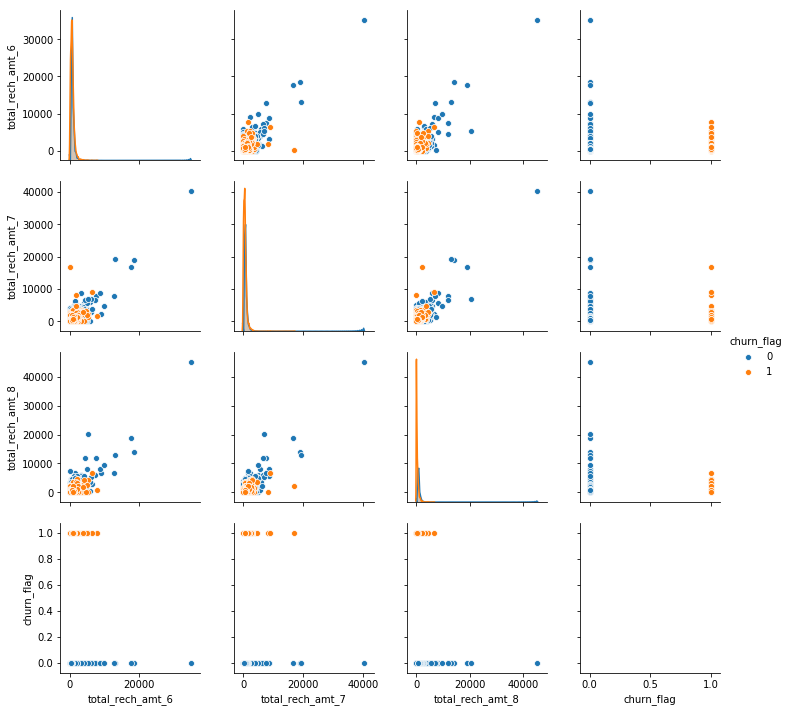

In [271]:
sns.pairplot(data=df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag')

## Last Day to Recharge

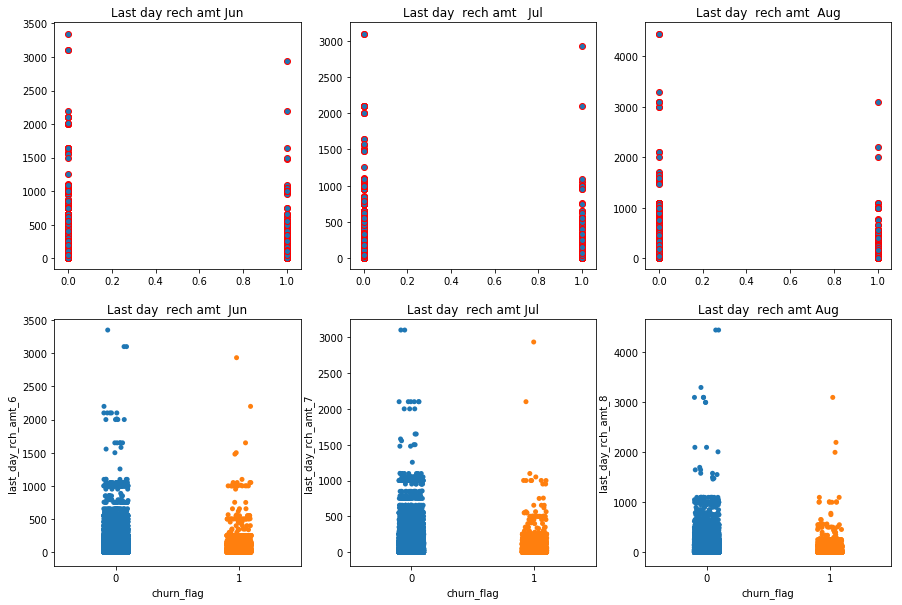

In [272]:

plt.figure(figsize=(15, 10))

# subplot 1
#y=df['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plt.subplot(2, 3, 1)
plt.title('Last day rech amt Jun')
plt.scatter(x='churn_flag',y='last_day_rch_amt_6',data = df,edgecolors='r')

# subplot 2
plt.subplot(2, 3, 2)
plt.title('Last day  rech amt   Jul')
plt.scatter(x='churn_flag',y='last_day_rch_amt_7',data = df,edgecolors='r')

# subplot 3
plt.subplot(2, 3, 3)
plt.title('Last day  rech amt  Aug')
plt.scatter(x='churn_flag',y='last_day_rch_amt_8',data = df,edgecolors='r')

# subplot 4
plt.subplot(2, 3, 4)
plt.title('Last day  rech amt  Jun')
sns.stripplot(x='churn_flag', y='last_day_rch_amt_6', data=df, jitter=True, edgecolor="gray")

# subplot 5
plt.subplot(2, 3, 5)
plt.title('Last day  rech amt Jul')
sns.stripplot(x='churn_flag', y='last_day_rch_amt_7', data=df, jitter=True, edgecolor="gray")

# subplot 6
plt.subplot(2, 3, 6)
plt.title('Last day  rech amt Aug')
sns.stripplot(x='churn_flag', y='last_day_rch_amt_8', data=df,  edgecolor="gray")
plt.show()



# Correlation

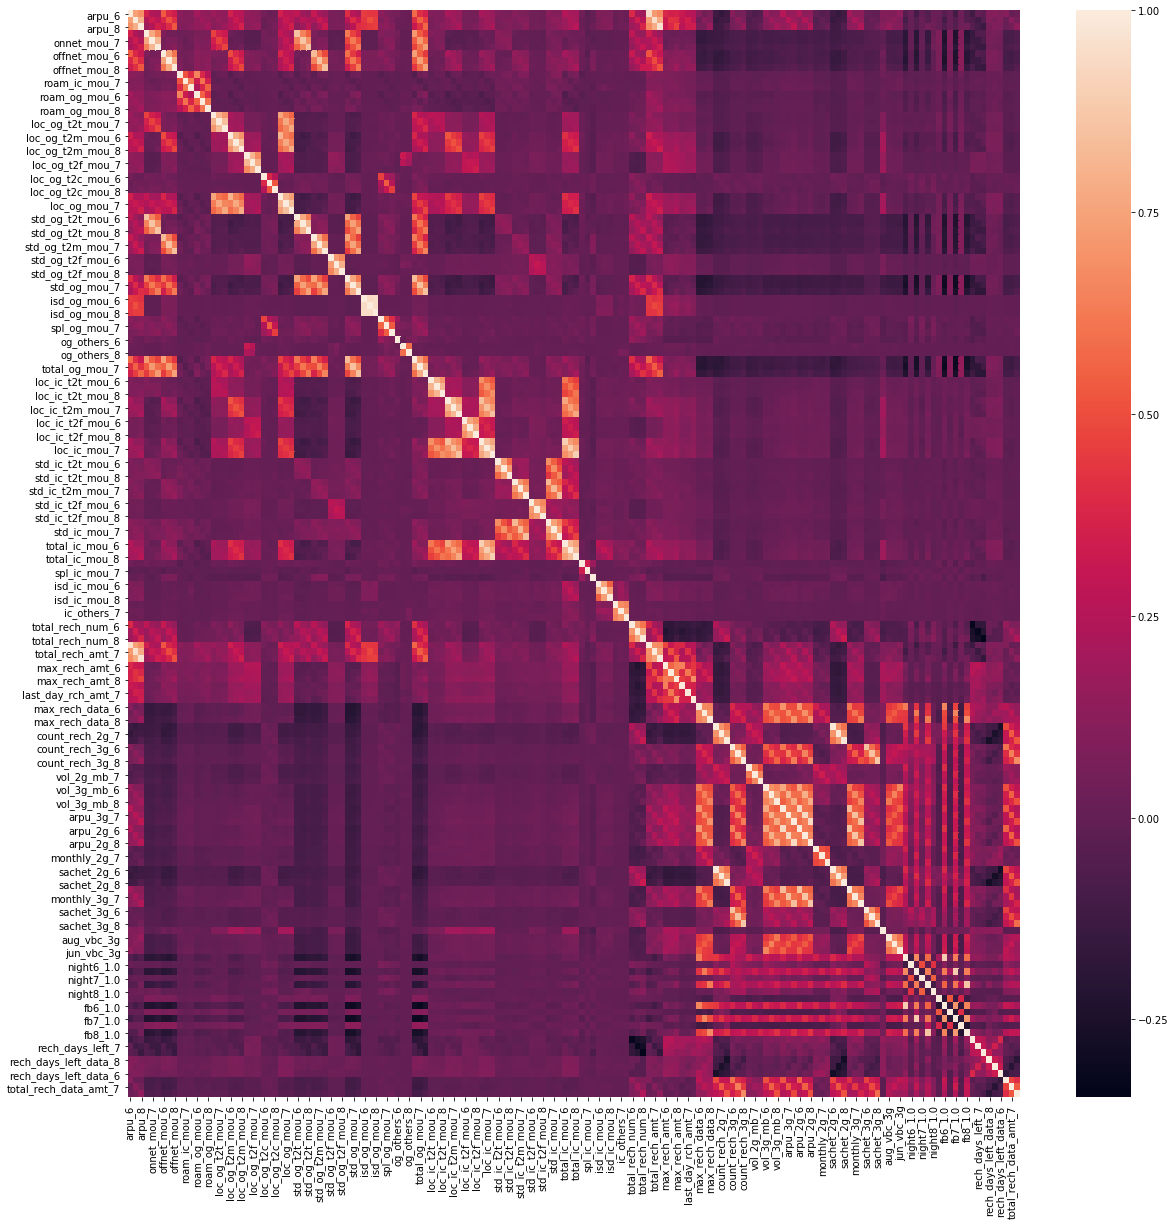

In [273]:
df_cor = df.drop(['mobile_number', 'churn_flag'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_cor.corr())

there are few correlated featured found in the dataframe.
We decided not to drop these columns manually rather using feature reduction methods. 

In [274]:
final_df = df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28971 entries, 0 to 97335
Columns: 162 entries, mobile_number to churn_flag
dtypes: float64(160), int64(1), object(1)
memory usage: 37.3+ MB


In [275]:
# Drop MemberID/Mobile-number
df = final_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = df.drop(['churn_flag'], axis=1)


# Outlier Evaluation



In [276]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

df_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count         mean          std  min       25%  \
arpu_6                 28971.0   537.046092   456.009455  0.0  294.0345   
arpu_7                 28971.0   546.822274   484.618351  0.0  299.8915   
arpu_8                 28971.0   502.867168   503.646837  0.0  228.2835   
onnet_mou_6            28971.0   259.122311   454.858745  0.0   15.9100   
onnet_mou_7            28971.0   269.940088   479.138775  0.0   15.2900   
onnet_mou_8            28971.0   239.318588   460.029177  0.0   11.1700   
offnet_mou_6           28971.0   367.843605   475.491369  0.0   67.4350   
offnet_mou_7           28971.0   377.990632   499.077400  0.0   68.0350   
offnet_mou_8           28971.0   338.190932   479.579436  0.0   49.5800   
roam_ic_mou_6          28971.0    15.642423    73.859545  0.0    0.0000   
roam_ic_mou_7          28971.0    12.369443    75.329180  0.0    0.0000   
roam_ic_mou_8          28971.0    12.489209    73.848269  0.0    0.0000   
roam_og_mou_6          28971.0    26.173017   115.048752  0.0    0.0000   
roam_og_mou_7          28971.0    19.899296    96.391250  0.0    0.0000   
roam_og_mou_8          28971.0    20.194350   106.072786  0.0    0.0000   
loc_og_t2t_mou_6       28971.0    83.290052   228.299552  0.0    3.8450   
loc_og_t2t_mou_7       28971.0    85.203291   241.871790  0.0    4.2600   
loc_og_t2t_mou_8       28971.0    78.237812   229.254180  0.0    2.5900   
loc_og_t2m_mou_6       28971.0   159.890851   246.707630  0.0   17.1100   
loc_og_t2m_mou_7       28971.0   161.470114   240.833350  0.0   19.0300   
loc_og_t2m_mou_8       28971.0   151.412297   232.367215  0.0   13.1000   
loc_og_t2f_mou_6       28971.0     6.180830    22.005728  0.0    0.0000   
loc_og_t2f_mou_7       28971.0     6.288850    21.814620  0.0    0.0000   
loc_og_t2f_mou_8       28971.0     5.829009    19.464061  0.0    0.0000   
loc_og_t2c_mou_6       28971.0     1.535197     6.227498  0.0    0.0000   
loc_og_t2c_mou_7       28971.0     1.862228     9.138795  0.0    0.0000   
loc_og_t2c_mou_8       28971.0     1.710429     7.220571  0.0    0.0000   
loc_og_mou_6           28971.0   249.369818   375.805180  0.0   28.8600   
loc_og_mou_7           28971.0   252.970484   375.847063  0.0   32.0900   
loc_og_mou_8           28971.0   235.486963   363.566206  0.0   22.6450   
...                        ...          ...          ...  ...       ...   
monthly_3g_7           28971.0     0.211867     0.644339  0.0    0.0000   
monthly_3g_8           28971.0     0.199441     0.607786  0.0    0.0000   
sachet_3g_6            28971.0     0.198474     0.966844  0.0    0.0000   
sachet_3g_7            28971.0     0.218632     1.058900  0.0    0.0000   
sachet_3g_8            28971.0     0.198923     1.096085  0.0    0.0000   
aon                    28971.0  1171.721411   974.768465  0.0  423.0000   
aug_vbc_3g             28971.0   151.939907   402.796888  0.0    0.0000   
jul_vbc_3g             28971.0   158.764066   424.673845  0.0    0.0000   
jun_vbc_3g             28971.0   138.474009   394.557056  0.0    0.0000   
night6_0.0             28971.0     0.488109     0.499867  0.0    0.0000   
night6_1.0             28971.0     0.013151     0.113924  0.0    0.0000   
night7_0.0             28971.0     0.504746     0.499986  0.0    0.0000   
night7_1.0             28971.0     0.012323     0.110323  0.0    0.0000   
night8_0.0             28971.0     0.480619     0.499633  0.0    0.0000   
night8_1.0             28971.0     0.011356     0.105960  0.0    0.0000   
fb6_0.0                28971.0     0.042215     0.201082  0.0    0.0000   
fb6_1.0                28971.0     0.459045     0.498328  0.0    0.0000   
fb7_0.0                28971.0     0.046322     0.210186  0.0    0.0000   
fb7_1.0                28971.0     0.470747     0.499152  0.0    0.0000   
fb8_0.0                28971.0     0.058162     0.234053  0.0    0.0000   
fb8_1.0                28971.0     0.433813     0.495608  0.0    0.0000   
rech_days_left_6       28971.0     3.165407     4.

In [285]:
# any value above 85 percentile replacing by mean, ignoring low percentile items
upper_quantiles = df_telecom.quantile(0.85)
mean_quantiles = df_telecom.quantile(0.50)
outliers_upper = (df_telecom > upper_quantiles)
df_telecom1 = df_telecom.mask(outliers_upper, mean_quantiles, axis=1)  


In [286]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

df_telecom1.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T


count        mean         std  min       25%  \
arpu_6                 28971.0  420.815389  200.153097  0.0  294.0345   
arpu_7                 28971.0  427.181055  199.921107  0.0  299.8915   
arpu_8                 28971.0  376.960204  207.943710  0.0  228.2835   
onnet_mou_6            28971.0  105.736607  119.513429  0.0   15.9100   
onnet_mou_7            28971.0  107.974459  124.594008  0.0   15.2900   
onnet_mou_8            28971.0   89.064834  104.034440  0.0   11.1700   
offnet_mou_6           28971.0  214.992994  173.743502  0.0   67.4350   
offnet_mou_7           28971.0  218.519310  179.354941  0.0   68.0350   
offnet_mou_8           28971.0  188.305736  162.953759  0.0   49.5800   
roam_ic_mou_6          28971.0    0.177072    0.879778  0.0    0.0000   
roam_ic_mou_7          28971.0    0.011717    0.113082  0.0    0.0000   
roam_ic_mou_8          28971.0    0.042678    0.284540  0.0    0.0000   
roam_og_mou_6          28971.0    0.333515    1.693734  0.0    0.0000   
roam_og_mou_7          28971.0    0.023555    0.227280  0.0    0.0000   
roam_og_mou_8          28971.0    0.066195    0.474365  0.0    0.0000   
loc_og_t2t_mou_6       28971.0   27.954004   30.594358  0.0    3.8450   
loc_og_t2t_mou_7       28971.0   28.532554   30.777722  0.0    4.2600   
loc_og_t2t_mou_8       28971.0   25.841085   29.426385  0.0    2.5900   
loc_og_t2m_mou_6       28971.0   80.447397   77.486352  0.0   17.1100   
loc_og_t2m_mou_7       28971.0   83.109855   78.219649  0.0   19.0300   
loc_og_t2m_mou_8       28971.0   75.305711   75.193044  0.0   13.1000   
loc_og_t2f_mou_6       28971.0    1.010436    2.052681  0.0    0.0000   
loc_og_t2f_mou_7       28971.0    1.058794    2.121877  0.0    0.0000   
loc_og_t2f_mou_8       28971.0    0.949124    1.956352  0.0    0.0000   
loc_og_t2c_mou_6       28971.0    0.069151    0.277438  0.0    0.0000   
loc_og_t2c_mou_7       28971.0    0.100344    0.366750  0.0    0.0000   
loc_og_t2c_mou_8       28971.0    0.087848    0.328933  0.0    0.0000   
loc_og_mou_6           28971.0  129.136226  121.823162  0.0   28.8600   
loc_og_mou_7           28971.0  133.550729  123.820948  0.0   32.0900   
loc_og_mou_8           28971.0  120.219401  117.054337  0.0   22.6450   
...                        ...         ...         ...  ...       ...   
monthly_3g_7           28971.0    0.000000    0.000000  0.0    0.0000   
monthly_3g_8           28971.0    0.000000    0.000000  0.0    0.0000   
sachet_3g_6            28971.0    0.000000    0.000000  0.0    0.0000   
sachet_3g_7            28971.0    0.000000    0.000000  0.0    0.0000   
sachet_3g_8            28971.0    0.000000    0.000000  0.0    0.0000   
aon                    28971.0  842.685962  576.170682  0.0  423.0000   
aug_vbc_3g             28971.0   21.555656   61.772693  0.0    0.0000   
jul_vbc_3g             28971.0   21.916936   62.859279  0.0    0.0000   
jun_vbc_3g             28971.0   15.698775   48.561654  0.0    0.0000   
night6_0.0             28971.0    0.488109    0.499867  0.0    0.0000   
night6_1.0             28971.0    0.000000    0.000000  0.0    0.0000   
night7_0.0             28971.0    0.504746    0.499986  0.0    0.0000   
night7_1.0             28971.0    0.000000    0.000000  0.0    0.0000   
night8_0.0             28971.0    0.480619    0.499633  0.0    0.0000   
night8_1.0             28971.0    0.000000    0.000000  0.0    0.0000   
fb6_0.0                28971.0    0.000000    0.000000  0.0    0.0000   
fb6_1.0                28971.0    0.459045    0.498328  0.0    0.0000   
fb7_0.0                28971.0    0.000000    0.000000  0.0    0.0000   
fb7_1.0                28971.0    0.470747    0.499152  0.0    0.0000   
fb8_0.0                28971.0    0.000000    0.000000  0.0    0.0000   
fb8_1.0                28971.0    0.433813    0.495608  0.0    0.0000   
rech_days_left_6       28971.0    1.767215    1.788180  0.0    0.0000   
rech_days_left_7       28971.0    1.978082    1.960070  0.0    0.0000   
rech_days_

In [287]:
X = df_telecom1
y = df['churn_flag']

In [288]:

X.shape

(28971, 160)

# Data Standardization/Normalization

In [289]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)

# Split Data into Train & Test

In [290]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, train_size=0.7, random_state=1)

In [291]:

print("X_train DF Shape {}".format(X_train.shape))
print("X_test DDF Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train: {}".format(y_train_imb))
print("Imbalance in Test: {}".format(y_test_imb))

X_train DF Shape (20279, 160)
X_test DDF Shape (8692, 160)
Imbalance in Train: 0.08241259674406191
Imbalance in Test: 0.08001988071570576


# Balance data set by SMOT

In [292]:
# (Training) Balance Data- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [293]:

print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37470, 160)
y_tr Dataframe Shape (37470,)
Imbalance in Train Data: 1.0


# Using PCA for Feature Reduction

In [294]:
#Impotting the PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [295]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37470, 160)
(8692, 160)


## Apply logistic regression

In [296]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [297]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6621 1427]
 [ 178  466]]


In [298]:

print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8153474459272895


In [299]:
pca.components_

array([[ 1.36627330e-01,  1.57054057e-01,  1.73011127e-01, ...,
        -2.86741802e-02, -2.50344151e-02, -3.71780721e-03],
       [-7.58249580e-02, -5.84088239e-02,  5.22043490e-02, ...,
         1.50809384e-01,  1.48256711e-01,  1.32617510e-01],
       [ 4.15636456e-02,  1.08960781e-01,  1.18840079e-01, ...,
         6.34798296e-02,  7.31238582e-02,  7.72162431e-02],
       ...,
       [ 0.00000000e+00,  5.45931456e-18, -1.10509605e-17, ...,
        -3.54048007e-17,  3.33957998e-17, -1.85951803e-17],
       [ 0.00000000e+00,  1.17155220e-17,  5.01657340e-18, ...,
         3.95149877e-17,  3.07317959e-18, -4.71791113e-17],
       [ 0.00000000e+00, -2.70717651e-17,  1.33236482e-16, ...,
        -1.08495316e-17, -1.53952497e-16,  2.35061155e-17]])

In [300]:

colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(15)

PC1       PC2       PC3        Feature
0   0.136627 -0.075825  0.041564         arpu_6
1   0.157054 -0.058409  0.108961         arpu_7
2   0.173011  0.052204  0.118840         arpu_8
3   0.106998 -0.066046  0.098823    onnet_mou_6
4   0.110592 -0.069470  0.116471    onnet_mou_7
5   0.118200 -0.022229  0.115215    onnet_mou_8
6   0.143166 -0.060197  0.014473   offnet_mou_6
7   0.152893 -0.057898  0.049523   offnet_mou_7
8   0.159970  0.010614  0.062581   offnet_mou_8
9   0.001548 -0.005939  0.045519  roam_ic_mou_6
10 -0.001591 -0.021211  0.024827  roam_ic_mou_7
11 -0.009927 -0.091312  0.059793  roam_ic_mou_8
12  0.001271  0.002091  0.021058  roam_og_mou_6
13 -0.008947 -0.004055  0.015637  roam_og_mou_7
14 -0.013090 -0.053608  0.029848  roam_og_mou_8

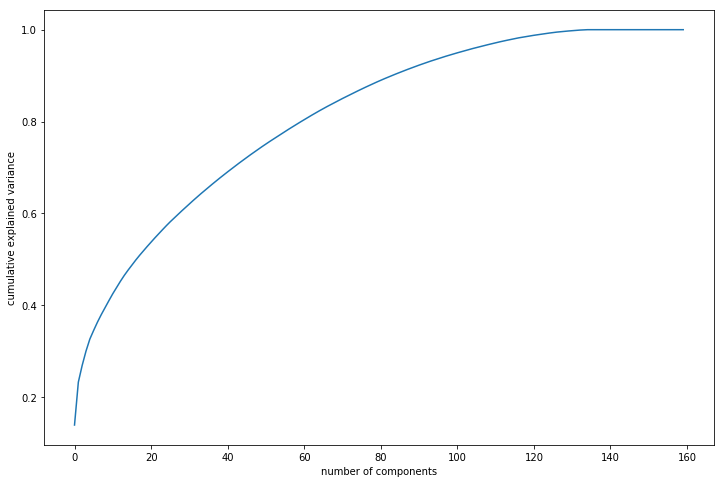

In [301]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

## Apply logistic regression with 90 column

In [302]:
pca90 = PCA(n_components=90)

In [303]:
df_train_pca90 = pca90.fit_transform(X_tr)
print(df_train_pca90.shape)
df_test_pca90 = pca90.transform(X_test)
print(df_test_pca90.shape)

(37470, 90)
(8692, 90)


In [304]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca90, y_tr)

# Predicted probabilities
y_pred90 = logsk1.predict(df_test_pca90)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred90)

In [305]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred90))

[[6636 1412]
 [ 178  466]]


In [306]:

print("LogisticRegression accuracy with PCA with 90: ",accuracy_score(y_test,y_pred90))




LogisticRegression accuracy with PCA with 90:  0.8170731707317073


In [307]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred90))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8048
           1       0.25      0.72      0.37       644

    accuracy                           0.82      8692
   macro avg       0.61      0.77      0.63      8692
weighted avg       0.92      0.82      0.85      8692





OBSERVATIONS

Data is imbalanced only 8% data is churn & remaining is non_churn<br /> 
SMOTE is applied to balance data<br /> 
82% accuracy with default PCA<br /> 
82% variance can be explained with 90 columns and maintain 82% accuracy<br /> 
False Positive Rate is high<br /><br />
Key features are <br /> <br /> 
arpu_6, arpu_7, arpu_8, <br /> 
onnet_mou_6, onnet_mou_7, onnet_mou_8, <br /> 
offnet_mou_6, offnet_mou_7, offnet_mou_8, <br /> 
roam_ic_mou_6<br /> 
roam_ic_mou_7<br /> 
roam_ic_mou_8<br /> 
roam_og_mou_6<br /> 
roam_og_mou_7<br /> 
roam_og_mou_8<br /> 


# RFE

# Data Standardization/Normalization

In [308]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)

# Split Data into Train & Test

In [309]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, train_size=0.7, random_state=1)

In [310]:

print("X_train DF Shape {}".format(X_train.shape))
print("X_test DDF Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train: {}".format(y_train_imb))
print("Imbalance in Test: {}".format(y_test_imb))

X_train DF Shape (20279, 160)
X_test DDF Shape (8692, 160)
Imbalance in Train: 0.08241259674406191
Imbalance in Test: 0.08001988071570576


# Balance data set by SMOT

In [311]:
# (Training) Balance Data- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [312]:

print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37470, 160)
y_tr Dataframe Shape (37470,)
Imbalance in Train Data: 1.0


# Feature reduction using RFE

In [313]:

# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 features
rfe = RFE(logreg, 15)   
rfe = rfe.fit(X_tr, y_tr)

In [314]:
#print(rfe.support_)
#print(rfe.ranking_) 
rfe_features = list(df_telecom.columns[rfe.support_])

In [315]:
#Key Features
rfe_features

['arpu_7',
 'loc_og_t2f_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'max_rech_data_7',
 'vol_2g_mb_8',
 'fb7_1.0',
 'fb8_1.0',
 'rech_days_left_8',
 'rech_days_left_data_8']

In [316]:

X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

# Logistics Regression for features identified by RFE

In [317]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [318]:

X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6518 1530]
 [ 185  459]]


In [319]:
#Accuracy of Model
classifier.score(X_test_rfe, y_test)

0.8026921306948919

In [320]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8048
           1       0.23      0.71      0.35       644

    accuracy                           0.80      8692
   macro avg       0.60      0.76      0.62      8692
weighted avg       0.92      0.80      0.84      8692



In [321]:
# Logistic Regression with RFE

# Accuracy is lower at 80%</br>
# False Positive is still high</br>
# Key Features are</br></br>

#  'arpu_7',
 # 'loc_og_t2f_mou_8',
 # 'total_og_mou_8',
 # 'loc_ic_t2t_mou_8',
 # 'loc_ic_t2m_mou_8',
 # 'total_ic_mou_8',
 # 'total_rech_num_6',
 # 'total_rech_amt_8',
 # 'last_day_rch_amt_8',
 # 'max_rech_data_7',
 # 'vol_2g_mb_8',
 # 'fb7_1.0',
 # 'fb8_1.0',
 # 'rech_days_left_8',
 # 'rech_days_left_data_8'

# Feature Reduction with Lasso and Decision Tree

# Data Standardization/Normalization

In [322]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)

# Split Data into Train & Test

In [323]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, train_size=0.7, random_state=1)

In [324]:

print("X_train DF Shape {}".format(X_train.shape))
print("X_test DDF Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train: {}".format(y_train_imb))
print("Imbalance in Test: {}".format(y_test_imb))

X_train DF Shape (20279, 160)
X_test DDF Shape (8692, 160)
Imbalance in Train: 0.08241259674406191
Imbalance in Test: 0.08001988071570576


# Balance data set by SMOT

In [325]:
# (Training) Balance Data- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [326]:

print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37470, 160)
y_tr Dataframe Shape (37470,)
Imbalance in Train Data: 1.0


## Lasso Feature Reduction

In [327]:

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)

print(X_lasso.shape)
print(pos)

(37470, 66)
[  0   1  10  11  14  17  20  21  22  23  24  26  29  34  40  53  55  56
  59  60  61  62  65  68  71  73  74  76  77  80  81  85  86  87  88  89
  90  91  93  95  99 100 101 103 104 105 108 111 113 114 116 118 121 122
 128 138 146 148 150 152 153 154 155 156 158 159]


In [328]:

#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
lasso_features

['arpu_6',
 'arpu_7',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'vol_2g_mb_6',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_8',
 'arpu_3g_7',
 'arpu_2g_7',

In [329]:

X_train = X_lasso
y_train = y_tr



In [330]:

print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37470 observations and 66 features
Unique target labels: [0 1]


## Decision Tree with default hyperparameter

In [331]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [332]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8048
           1       0.20      0.77      0.31       644

    accuracy                           0.75      8692
   macro avg       0.59      0.76      0.58      8692
weighted avg       0.92      0.75      0.81      8692



In [333]:

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6012 2036]
 [ 148  496]]
0.7487344684767603


In [ ]:
# the accuracy has reduced to 75%

## Tuning max_depth

In [334]:

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [336]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.177192      0.021144         0.002232        0.000477   
1       0.262193      0.012215         0.002159        0.000388   
2       0.483882      0.105163         0.002416        0.000209   
3       0.523616      0.137591         0.002005        0.000106   
4       0.525730      0.021998         0.002087        0.000139   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.725380           0.739125   
1               2  {'max_depth': 2}           0.765813           0.785028   
2               3  {'max_depth': 3}           0.765813           0.785028   
3               4  {'max_depth': 4}           0.796637           0.831865   
4               5  {'max_depth': 5}           0.807446           0.846944   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.738457           0.754737       ...                0.741820   
1           0.788231           0.794369       ...                0.786229   
2           0.788231           0.794369       ...                0.786229   
3           0.825594           0.821057       ...                0.820817   
4           0.834801           0.846144       ...                0.835095   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.010464               39            0.746731            0.743094   
1        0.011138               37            0.792467            0.786496   
2        0.011138               37            0.792467            0.786496   
3        0.012613               36            0.831398            0.823225   
4        0.014508               35            0.843408            0.847478   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.743361            0.739425            0.740125   
1            0.786396            0.785262            0.784027   
2            0.786396            0.785262            0.784027   
3            0.825394            0.818221            0.823792   
4            0.835969            0.845543            0.836002   

   mean_train_score  std_train_score  
0          0.742547         0.002611  
1          0.786930         0.002910  
2          0.786930         0.002910  
3          0.824406         0.004240  
4          0.841680         0.004825  

[5 rows x 21 columns]

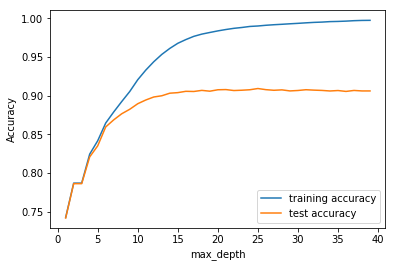

In [337]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# # ideal is 5 - 15

## Tuning min_samples_split

In [338]:

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [339]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.185043      0.125928         0.004345        0.001267   
1       1.914845      0.060401         0.002917        0.000282   
2       2.027592      0.128201         0.003630        0.000109   
3       2.061504      0.201779         0.003608        0.000085   
4       2.414518      0.091726         0.003916        0.000233   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.853082   
1                      25  {'min_samples_split': 25}           0.840005   
2                      45  {'min_samples_split': 45}           0.834935   
3                      65  {'min_samples_split': 65}           0.835335   
4                      85  {'min_samples_split': 85}           0.835335   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.912864           0.916333           0.912597       ...          
1           0.907126           0.909528           0.905791       ...          
2           0.904190           0.906992           0.903790       ...          
3           0.898185           0.906725           0.900187       ...          
4           0.893782           0.904190           0.902055       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.903416        0.025404                1            0.996230   
1         0.896584        0.028758                2            0.972044   
2         0.893301        0.029548                3            0.957132   
3         0.891140        0.028533                4            0.945490   
4         0.889939        0.028076                5            0.939118   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.993361            0.993395            0.993161   
1            0.960702            0.962203            0.962870   
2            0.941987            0.945456            0.945423   
3            0.930845            0.934548            0.935248   
4            0.921204            0.927842            0.925874   

   split4_train_score  mean_train_score  std_train_score  
0            0.993828          0.993995         0.001139  
1            0.961436          0.963851         0.004161  
2            0.942954          0.946591         0.005444  
3            0.934714          0.936169         0.004916  
4            0.928009          0.928409         0.005891  

[5 rows x 21 columns]

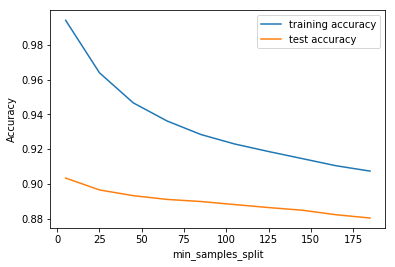

In [340]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#as increase min_samples_split, the tree looks better
# ideal is 25 - 75

In [341]:
# Sample Leaf

In [343]:

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [344]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.038014      0.217385         0.005231        0.003090   
1       1.460417      0.101079         0.003081        0.000509   
2       1.301998      0.050554         0.002584        0.000195   
3       1.116883      0.045456         0.003365        0.000146   
4       1.015715      0.033657         0.003401        0.000187   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.845076   
1                     25  {'min_samples_leaf': 25}           0.840673   
2                     45  {'min_samples_leaf': 45}           0.827729   
3                     65  {'min_samples_leaf': 65}           0.838537   
4                     85  {'min_samples_leaf': 85}           0.834134   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.903122           0.915266           0.907926       ...          
1           0.899119           0.901521           0.896184       ...          
2           0.890846           0.893114           0.891780       ...          
3           0.883507           0.888578           0.883907       ...          
4           0.882039           0.880438           0.876434       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.898505        0.027415                1            0.973712   
1         0.888417        0.024032                2            0.929844   
2         0.881025        0.026923                3            0.913364   
3         0.877582        0.019850                4            0.904457   
4         0.872431        0.019582                5            0.895950   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.961703            0.963604            0.961369   
1            0.913965            0.911863            0.913798   
2            0.894549            0.898752            0.897451   
3            0.886109            0.892647            0.887477   
4            0.882873            0.882740            0.879904   

   split4_train_score  mean_train_score  std_train_score  
0            0.963104          0.964698         0.004584  
1            0.913297          0.916553         0.006686  
2            0.898852          0.900594         0.006571  
3            0.889111          0.891960         0.006620  
4            0.883407          0.884975         0.005622  

[5 rows x 21 columns]

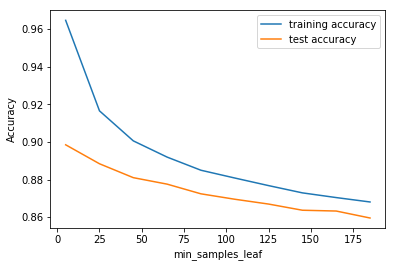

In [345]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [346]:
#ideal 25 - 75

In [347]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 75, 35),
    'min_samples_split': range(25, 100, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [348]:

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.866221      0.056569         0.002787        0.001440   
1        0.668386      0.036260         0.002103        0.000099   
2        0.699012      0.030714         0.002446        0.000484   
3        0.756093      0.049031         0.002717        0.001141   
4        0.723002      0.045049         0.002624        0.000775   
5        0.670178      0.007445         0.002288        0.000395   
6        1.165474      0.065887         0.002290        0.000118   
7        1.209053      0.061727         0.002637        0.000579   
8        1.506294      0.199355         0.002761        0.000452   
9        1.197691      0.064284         0.002708        0.000350   
10       1.082947      0.070413         0.002355        0.000060   
11       1.274353      0.292309         0.002972        0.000803   
12       0.629676      0.022624         0.002695        0.001053   
13       0.783470      0.142442         0.002720        0.000479   
14       0.710046      0.056370         0.002264        0.000236   
15       0.637206      0.028167         0.002450        0.000298   
16       0.754066      0.122469         0.002736        0.001154   
17       0.749531      0.168862         0.003096        0.000461   
18       1.178365      0.236509         0.002977        0.000914   
19       1.031771      0.061283         0.002842        0.000504   
20       0.938263      0.014321         0.002404        0.000223   
21       0.905227      0.046812         0.002721        0.000405   
22       0.990526      0.087479         0.003007        0.001237   
23       0.891833      0.013959         0.002357        0.000077   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     25   
1          entropy               5                     25   
2          entropy               5                     25   
3          entropy               5                     60   
4          entropy               5                     60   
5          entropy               5                     60   
6          entropy              10                     25   
7          entropy              10                     25   
8          entropy              10                     25   
9          entropy              10                     60   
10         entropy              10                     60   
11         entropy              10                     60   
12            gini               5                     25   
13            gini               5                     25   
14            gini               5                     25   
15            gini               5                     60   
16            gini               5                     60   
17            gini               5                     60   
18            gini              10                     25   
19            gini              10                     25   
20            gini              10                     25   
21            gini              10                     60   
22            gini              10                     60   
23            gini              10                     60   

   param_min_samples_split                                             params  \
0                       25  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       75  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                       25  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
5                       75  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
6                       25  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       75  {'criterion': 'entro

In [349]:
# # printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8832666132906325
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [350]:

# # model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=25)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [351]:
# # accuracy score
clf_gini.score(X_test,y_test)

0.8408881730326737

In [ ]:
# The Lasso features is around 66
# Accuracy has improved to 84

# Key Features are as below

In [352]:
lasso_features

['arpu_6',
 'arpu_7',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'vol_2g_mb_6',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_8',
 'arpu_3g_7',
 'arpu_2g_7',

# LASSO AND RANDOM FOREST

# Data Standardization/Normalization

In [353]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)

# Split Data into Train & Test

In [354]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, train_size=0.7, random_state=1)

In [355]:

print("X_train DF Shape {}".format(X_train.shape))
print("X_test DDF Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train: {}".format(y_train_imb))
print("Imbalance in Test: {}".format(y_test_imb))

X_train DF Shape (20279, 160)
X_test DDF Shape (8692, 160)
Imbalance in Train: 0.08241259674406191
Imbalance in Test: 0.08001988071570576


# Balance data set by SMOT

In [356]:
# (Training) Balance Data- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [357]:

print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37470, 160)
y_tr Dataframe Shape (37470,)
Imbalance in Train Data: 1.0


## LASSO FEATURE REDUCTION

In [358]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37470, 68)
[  0   1  10  11  14  16  17  20  21  22  23  24  26  29  34  40  46  53
  55  56  59  60  61  65  68  71  73  74  76  77  80  81  85  86  87  88
  89  90  91  93  94  95  99 100 101 103 104 105 108 111 113 114 116 118
 121 122 128 138 146 148 150 152 153 154 155 156 158 159]


In [359]:

#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
lasso_features

['arpu_6',
 'arpu_7',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_7',
 'spl_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'vol_2g_mb_6',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol

In [360]:
X_train = X_lasso
y_train = y_tr

## Random Forest - default hyperparameter

In [361]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [362]:

# fit
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [363]:

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test)

In [364]:

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8048
           1       0.43      0.40      0.41       644

    accuracy                           0.92      8692
   macro avg       0.69      0.68      0.68      8692
weighted avg       0.91      0.92      0.91      8692



In [365]:

# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[7701  347]
 [ 387  257]]


In [366]:
print(accuracy_score(y_test, predictions))

0.9155545329038196


In [367]:
# The accuracy in Random Forest has improved to about 92%
# the False Positive has also decreased 

# significant improvement with feature selection with Lasso and Random Forest

## Hyperparameter Tuning - Random Forest

In [ ]:
### Tuning Max Depth

In [368]:

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [369]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.352513      0.063507         0.016945        0.006026   
1       0.797827      0.143994         0.013635        0.001585   
2       0.964634      0.027470         0.014560        0.001017   
3       1.144694      0.033154         0.017165        0.001090   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.770216           0.801441   
1               7   {'max_depth': 7}           0.842007           0.874833   
2              12  {'max_depth': 12}           0.893515           0.927275   
3              17  {'max_depth': 17}           0.902722           0.945156   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.784094           0.815052       ...                0.793221   
1           0.876168           0.881772       ...                0.869656   
2           0.921804           0.931812       ...                0.921938   
3           0.948759           0.951428       ...                0.939338   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.015238                4            0.792567            0.804177   
1        0.014108                3            0.889378            0.878803   
2        0.014913                2            0.965139            0.956132   
3        0.018416                1            0.984654            0.983687   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.787330            0.802742            0.793835   
1            0.880004            0.881639            0.878069   
2            0.954864            0.955731            0.959801   
3            0.984121            0.985088            0.983453   

   mean_train_score  std_train_score  
0          0.796130         0.006385  
1          0.881579         0.004083  
2          0.958333         0.003798  
3          0.984201         0.000604  

[4 rows x 21 columns]

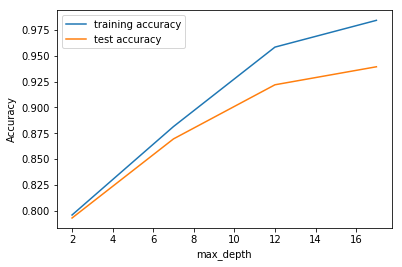

In [370]:

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [371]:
#ideal for max depth is 12 - 14

In [ ]:
###Tuning n_estimators

In [372]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# # instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# # fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [373]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.774530      2.464897         0.101407        0.039915   
1      23.686547      2.789509         0.415694        0.074142   
2      44.944360      3.894182         0.696982        0.101316   
3      63.304203      4.790752         1.012163        0.164125   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.815853   
1                500   {'n_estimators': 500}           0.811449   
2                900   {'n_estimators': 900}           0.811316   
3               1300  {'n_estimators': 1300}           0.810115   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.827996           0.834001           0.842140       ...          
1           0.834401           0.836002           0.841340       ...          
2           0.831732           0.835335           0.839071       ...          
3           0.830264           0.835201           0.838404       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.830558        0.008647                3            0.845176   
1         0.831972        0.010518                1            0.841673   
2         0.830691        0.009965                2            0.841440   
3         0.829624        0.010095                4            0.840673   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.830264            0.830731            0.832666   
1            0.833367            0.830898            0.832699   
2            0.831699            0.830131            0.830665   
3            0.831799            0.830464            0.830464   

   split4_train_score  mean_train_score  std_train_score  
0            0.831632          0.834094         0.005602  
1            0.832699          0.834267         0.003793  
2            0.833033          0.833393         0.004143  
3            0.831499          0.832980         0.003884  

[4 rows x 21 columns]

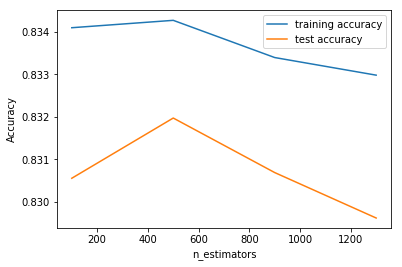

In [374]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [375]:
#ideal for estimator is 500

In [ ]:
###Tuning max_features

In [376]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features':range(4, 56, 4)}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [377]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.341864      0.051623         0.019991        0.010657   
1       0.425271      0.022151         0.010941        0.000293   
2       0.574479      0.014471         0.011386        0.000602   
3       0.752049      0.031992         0.012227        0.001633   
4       0.902897      0.007393         0.011031        0.000386   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.795703   
1                  8   {'max_features': 8}           0.810248   
2                 12  {'max_features': 12}           0.811182   
3                 16  {'max_features': 16}           0.806779   
4                 20  {'max_features': 20}           0.806112   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.811716           0.821457           0.816386       ...          
1           0.836136           0.823058           0.836402       ...          
2           0.833333           0.830665           0.837870       ...          
3           0.830931           0.841873           0.842407       ...          
4           0.839338           0.846944           0.844009       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.813104        0.009343               13            0.815386   
1         0.824473        0.010449               12            0.840406   
2         0.830051        0.009793               11            0.843742   
3         0.832266        0.013391               10            0.843175   
4         0.834801        0.014722                7            0.842707   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.812083            0.816153            0.804577   
1            0.838104            0.819789            0.823859   
2            0.832866            0.827796            0.828730   
3            0.833000            0.836769            0.834568   
4            0.834601            0.836336            0.835902   

   split4_train_score  mean_train_score  std_train_score  
0            0.815986          0.812837         0.004386  
1            0.815119          0.827455         0.010050  
2            0.829630          0.832553         0.005849  
3            0.834668          0.836436         0.003576  
4            0.833767          0.836663         0.003158  

[5 rows x 21 columns]

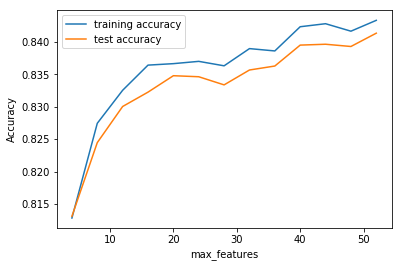

In [378]:

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [380]:
#ideal - 15 - 30

In [ ]:
###Tuning min_samples_leaf

In [379]:

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [381]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.021881      0.137352         0.016530        0.001750   
1       0.825950      0.047826         0.015616        0.001517   
2       0.741133      0.035716         0.013951        0.000686   
3       0.741775      0.047211         0.014016        0.000800   
4       0.706406      0.091904         0.013411        0.000626   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.846010   
1                    150  {'min_samples_leaf': 150}           0.834801   
2                    200  {'min_samples_leaf': 200}           0.835869   
3                    250  {'min_samples_leaf': 250}           0.824927   
4                    300  {'min_samples_leaf': 300}           0.826261   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.880438           0.878703           0.889645       ...          
1           0.863090           0.867894           0.875367       ...          
2           0.857886           0.859221           0.873098       ...          
3           0.858420           0.853750           0.862957       ...          
4           0.854684           0.850947           0.858687       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.876248        0.015629                1            0.896984   
1         0.862130        0.014216                2            0.878703   
2         0.857913        0.012242                3            0.873599   
3         0.850627        0.013335                5            0.865592   
4         0.851374        0.013549                4            0.861022   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.881272            0.876735            0.883907   
1            0.863624            0.868895            0.869195   
2            0.858487            0.860021            0.861956   
3            0.858387            0.846110            0.855151   
4            0.851014            0.849046            0.849079   

   split4_train_score  mean_train_score  std_train_score  
0            0.883907          0.884561         0.006742  
1            0.866126          0.869309         0.005116  
2            0.858820          0.862577         0.005643  
3            0.850881          0.855224         0.006625  
4            0.858954          0.853823         0.005126  

[5 rows x 21 columns]

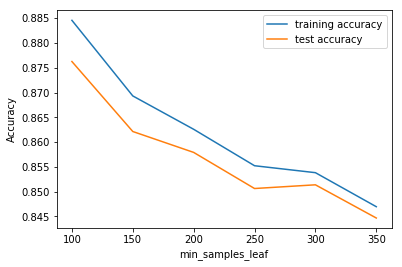

In [382]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [383]:
#ideal - 100 - 200

In [ ]:
###Tuning min_samples_split

In [384]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [385]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.600560      0.165378         0.020696        0.005983   
1       1.431732      0.303484         0.017028        0.003480   
2       1.151179      0.041606         0.014320        0.000274   
3       1.123189      0.033670         0.013891        0.000164   
4       1.836878      0.705829         0.019910        0.006801   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.857219   
1                     250  {'min_samples_split': 250}           0.847745   
2                     300  {'min_samples_split': 300}           0.847078   
3                     350  {'min_samples_split': 350}           0.841473   
4                     400  {'min_samples_split': 400}           0.837337   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.900053           0.907259           0.911262       ...          
1           0.900187           0.902989           0.905258       ...          
2           0.894315           0.900053           0.907526       ...          
3           0.891780           0.893515           0.893648       ...          
4           0.895116           0.889378           0.895250       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.895490        0.019549                1            0.928309   
1         0.891994        0.022186                2            0.915799   
2         0.888711        0.021363                3            0.910528   
3         0.882626        0.020587                4            0.906425   
4         0.880384        0.021872                5            0.899286   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.907359            0.913798            0.911896   
1            0.905191            0.907726            0.904357   
2            0.899720            0.902422            0.902322   
3            0.895283            0.890879            0.893648   
4            0.893081            0.889045            0.893048   

   split4_train_score  mean_train_score  std_train_score  
0            0.911829          0.914638         0.007155  
1            0.905958          0.907806         0.004148  
2            0.898285          0.902655         0.004239  
3            0.894449          0.896137         0.005353  
4            0.885742          0.892040         0.004544  

[5 rows x 21 columns]

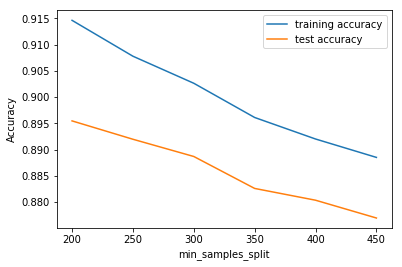

In [386]:
# # plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [387]:
#ideal 200 - 300

In [ ]:
###Grid Search to Find Optimal Hyperparameters

In [390]:
#Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,14,2],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 300, 100),
    'n_estimators': [300,500, 100], 
    'max_features': [10,15,30,35]
}
 #Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [391]:

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 166.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [394]:
# # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8839071257005604 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [414]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                              max_depth=14,
                              min_samples_leaf=100, 
                              min_samples_split=200,
                              max_features=15,
                              n_estimators=300)

In [415]:
 # fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [416]:
# # predict
predictions = rfc.predict(X_test)

In [417]:

# evaluation metrics

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      8048
           1       0.32      0.68      0.43       644

    accuracy                           0.87      8692
   macro avg       0.65      0.78      0.68      8692
weighted avg       0.92      0.87      0.89      8692

[[7102  946]
 [ 203  441]]


Accuracy for the test dataset 86.8%
ROC for the test dataset 87.7%


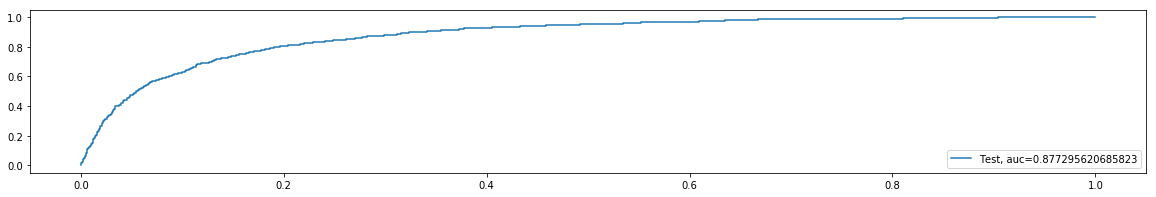

In [422]:
preds_RF = predictions
preds_probs_RF=rfc.predict_proba(X_test)[:,1]


accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RF)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [421]:
#Reduction in accuracy as 87% as compared to 92% in RF with Default

# Major improvement in Recall of Churn
# But True Positive Rate is very high 68% (Actually a churn predicted a Churn)

# Other parameters remaining the same. This is great

# This option is best for prediction of Churn

# Conclusion

<b>Feature Selection with RFE and Logistic Regression, the key parameter was:</b>

                 precision    recall  f1-score   support

           0       0.97      0.81      0.88      8048
           1       0.23      0.71      0.35       644

    accuracy                           0.80      8692
    macro avg       0.60      0.76      0.62      8692
    weighted avg        0.92      0.80      0.84      8692


Number of features selected was 15


<b>Feature Selection with Lasso and Decision Tree - default, the key parameter was:</b> 

        precision    recall  f1-score   support

           0       0.98      0.75      0.85      8048
           1       0.20      0.77      0.31       644

    accuracy                           0.75      8692
    macro avg       0.59      0.76      0.58      8692
    weighted avg       0.92      0.75      0.81      8692

Number of features selected was 66 (by Lasso)


<b>Feature Selection with Lasso and Random Forest - Default, the key parameter was:</b> 


            precision    recall  f1-score   support

           0       0.95      0.96      0.95      8048
           1       0.43      0.40      0.41       644

    accuracy                           0.92      8692
    macro avg       0.69      0.68      0.68      8692
    weighted avg       0.91      0.92      0.91      8692
    
    
Number of features selected was 66 (by Lasso)


<b>eature Selection with Lasso and Random Forest - Tuning, the key parameter was:</b>


                precision    recall  f1-score   support

           0       0.97      0.88      0.92      8048
           1       0.31      0.67      0.43       644
            
    accuracy                           0.87      8692
    macro avg       0.64      0.78      0.67      8692
    weighted avg       0.92      0.87      0.89      8692

[[7092  956]
 [ 212  432]]

# Features Model 

In [419]:
# we use Lasso for Key Feature determination

importances = rfc.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value           colName
0   1.395359e-01  loc_ic_t2f_mou_8
1   1.354395e-01  std_og_t2t_mou_6
2   1.143643e-01  loc_og_t2f_mou_8
3   6.543968e-02  loc_og_t2m_mou_8
4   5.792106e-02  loc_ic_t2f_mou_6
5   5.193471e-02      isd_og_mou_8
6   4.758558e-02     roam_og_mou_7
7   4.418979e-02      offnet_mou_7
8   3.660490e-02      std_og_mou_8
9   2.680349e-02  loc_og_t2t_mou_8
10  2.471475e-02      loc_ic_mou_6
11  2.075019e-02      offnet_mou_6
12  2.016856e-02      isd_og_mou_6
13  1.730196e-02      loc_ic_mou_7
14  1.722937e-02  loc_ic_t2f_mou_7
15  1.667274e-02  loc_og_t2m_mou_7
16  1.231271e-02      loc_og_mou_8
17  1.087314e-02  loc_og_t2t_mou_7
18  1.057331e-02      loc_ic_mou_8
19  9.772727e-03  std_og_t2f_mou_8
20  8.691104e-03      spl_og_mou_6
21  8.519372e-03            arpu_7
22  8.043003e-03      std_og_mou_6
23  7.802761e-03  loc_ic_t2m_mou_7
24  7.506046e-03  std_ic_t2t_mou_7
25  7.383661e-03  std_og_t2f_mou_7
26  7.075314e-03  loc_ic_t2m_mou_8
27  6.658948e-03            arpu_6
28  6.134613e-03      isd_og_mou_7
29  5.512880e-03      std_og_mou_7
..           ...               ...
38  2.042126e-03  std_ic_t2t_mou_6
39  1.978888e-03  loc_og_t2t_mou_6
40  1.934850e-03       og_others_8
41  1.808647e-03  loc_og_t2f_mou_6
42  1.728817e-03      loc_og_mou_7
43  1.699066e-03  loc_og_t2c_mou_6
44  1.650727e-03  loc_ic_t2t_mou_7
45  1.580278e-03      offnet_mou_8
46  1.545235e-03     roam_ic_mou_6
47  1.447174e-03       og_others_7
48  9.633695e-04    total_og_mou_7
49  8.615268e-04  loc_ic_t2t_mou_8
50  8.366027e-04  loc_ic_t2t_mou_6
51  6.114015e-04       og_others_6
52  4.430377e-04     roam_ic_mou_7
53  2.981346e-04       onnet_mou_7
54  2.678370e-04    total_og_mou_6
55  1.468340e-04  loc_ic_t2m_mou_6
56  1.142945e-04    total_og_mou_8
57  7.314135e-05  std_og_t2f_mou_6
58  4.772043e-05  std_og_t2m_mou_7
59  4.168778e-05  std_og_t2t_mou_7
60  3.167725e-05      loc_og_mou_6
61  2.075289e-05  std_og_t2t_mou_8
62  1.846021e-05     roam_ic_mou_8
63  1.659457e-05  std_og_t2m_mou_8
64  1.370608e-05     roam_og_mou_6
65  7.161218e-06  loc_og_t2c_mou_8
66  2.583967e-06  std_og_t2m_mou_6
67  4.923046e-07            arpu_8

[68 rows x 2 columns]

<Figure size 432x288 with 0 Axes>

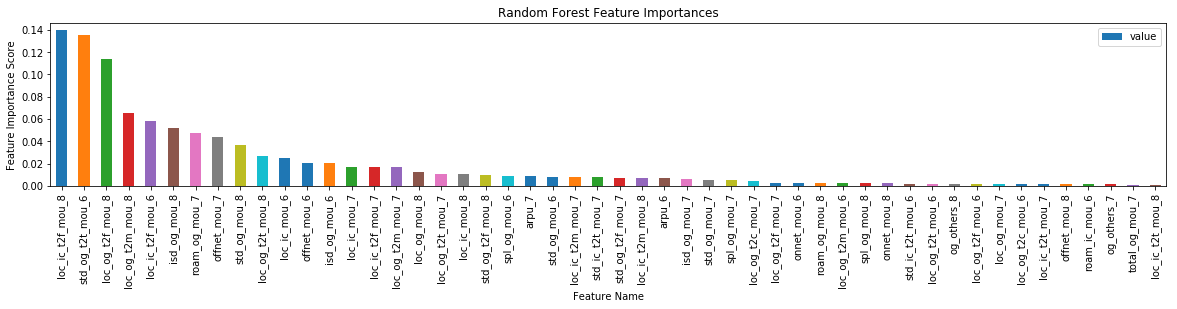

In [420]:


plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

In [ ]:
# The above graph graphically displays the important features
# Local Incoming calls, local outgoing from Operator T to fixed line of T is most important, 
#schemes around by giving targted campaigns will help reduce churn
#
#Also any reduction in STD, ISD and Local Outgoing Monthly usage is a trigger for launching schemes to retain 
#

#Key features are as below

In [424]:
sorted_feature_importance.head(15)

value           colName
0   0.139536  loc_ic_t2f_mou_8
1   0.135440  std_og_t2t_mou_6
2   0.114364  loc_og_t2f_mou_8
3   0.065440  loc_og_t2m_mou_8
4   0.057921  loc_ic_t2f_mou_6
5   0.051935      isd_og_mou_8
6   0.047586     roam_og_mou_7
7   0.044190      offnet_mou_7
8   0.036605      std_og_mou_8
9   0.026803  loc_og_t2t_mou_8
10  0.024715      loc_ic_mou_6
11  0.020750      offnet_mou_6
12  0.020169      isd_og_mou_6
13  0.017302      loc_ic_mou_7
14  0.017229  loc_ic_t2f_mou_7

# Conclusion on Churn Prediction Model

In [426]:


# Based on the above the preferred method for 

# Feature Selection  is Lasso
# For Churn Prediction is Lasso with Random Forest with Tuning, since
# Accuracy  - 87 %  (means Error Rate is only 13%)
# Precision of 1  -   31% (Precision of 1, 31%, when the model predicted Churn, 43% times it is correct)
# Recall or Sensitivity of 1 - 67%  (Recall of 1 means , when it is actually a Churn 40% times the model predicted well)

# The true positive rate is most important since the Company would like to predict a churn when it ia a churn and
# TPR is highest in this model



# Given we have acceptable matrix, we dediced not to pursue SVM

# Summary

In [427]:
# Feature Selection - Lasso
# Churn Prediction - Random Forest